In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [4]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        labels_a = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 'tree' in csvFile:
                labels.append("Tree")
                labels_x.append('Tree')
                labels_a.append('Tree')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
                labels_a.append('seq2seq')
            elif 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
                labels_a.append('Real')
            #elif 'se' in csvFile:
            #    labels.append("Semantic")
            #    labels_x.append('Semantic')
            #    labels_a.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
                labels_a.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & seq2seq " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Tree " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Tree " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                #elif 'se' in csvFile:
                #    is_w = False
                #    for w in weights:
                #        if w in csvFile:
                #            labels_a.append("Rico & Semantic " + w)
                #            labels_x.append(w)
                #            if w == "0.1":
                #                labels.append("Rico & Semantic " + w)
                #                is_w = True
                #                break
                #            else:
                #                labels.append(w)
                #                is_w = True
                #                break
                #    if not is_w:
                #        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            #    elif 'se' in csvFile:
            #        is_w = False
            #        for w in weights:
            #            if w in csvFile:
            #                labels_a.append("seq2seq & Semantic " + w)
            #                labels_x.append(w)
            #                if w == "0.1":
            #                    labels.append("seq2seq & Semantic " + w)
            #                    is_w = True
            #                    break
            #                else:
            #                    labels.append(w)
            #                    is_w = True
            #                    break
            #        if not is_w:
            #            continue
            elif 'tree' in csvFile:
                #if 'se' in csvFile:
                #    is_w = False
                #    for w in weights:
                #        if w in csvFile:
                #            labels_a.append("Tree & Semantic " + w)
                #            labels_x.append(w)
                #            if w == "0.1":
                #                labels.append("Tree & Semantic " + w)
                #                is_w = True
                #                break
                #            else:
                #                labels.append(w)
                #                is_w = True
                #                break
                #    if not is_w:
                #        continue
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Tree & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Tree & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels_a.append("Real & Semantic " + w)
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                #elif 'se' in csvFile:
                #    is_w = False
                #    for w in weights:
                #        if w in csvFile:
                #            is_w = True
                #            break
                #    if not is_w:
                #        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            #    elif 'se' in csvFile:
            #        is_w = False
            #        for w in weights:
            #            if w in csvFile:
            #                is_w = True
            #                break
            #        if not is_w:
            #            continue
            elif 'tree' in csvFile:
                #if 'se' in csvFile:
                #    is_w = False
                #    for w in weights:
                #        if w in csvFile:
                #            is_w = True
                #            break
                #    if not is_w:
                #        continue
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [5]:
print(df_nmi_23)

    K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
0           0.504          0.504      0.496      0.496
1           0.520          0.520      0.519      0.519
2           0.541          0.541      0.541      0.541
3           0.640          0.640      0.632      0.632
4           0.503          0.503      0.500      0.502
5           0.508          0.502      0.505      0.500
6           0.507          0.501      0.500      0.499
7           0.503          0.504      0.499      0.501
8           0.501          0.504      0.498      0.508
9           0.501          0.505      0.505      0.508
10          0.505          0.513      0.507      0.508
11          0.516          0.525      0.514      0.517
12          0.529          0.531      0.521      0.525
13          0.535          0.543      0.536      0.538
14          0.540          0.547      0.538      0.537
15          0.545          0.548      0.541      0.544
16          0.548          0.555      0.552      0.553
17        

In [6]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 27 0.433
1 27 0.452
2 27 0.44
3 26 0.441


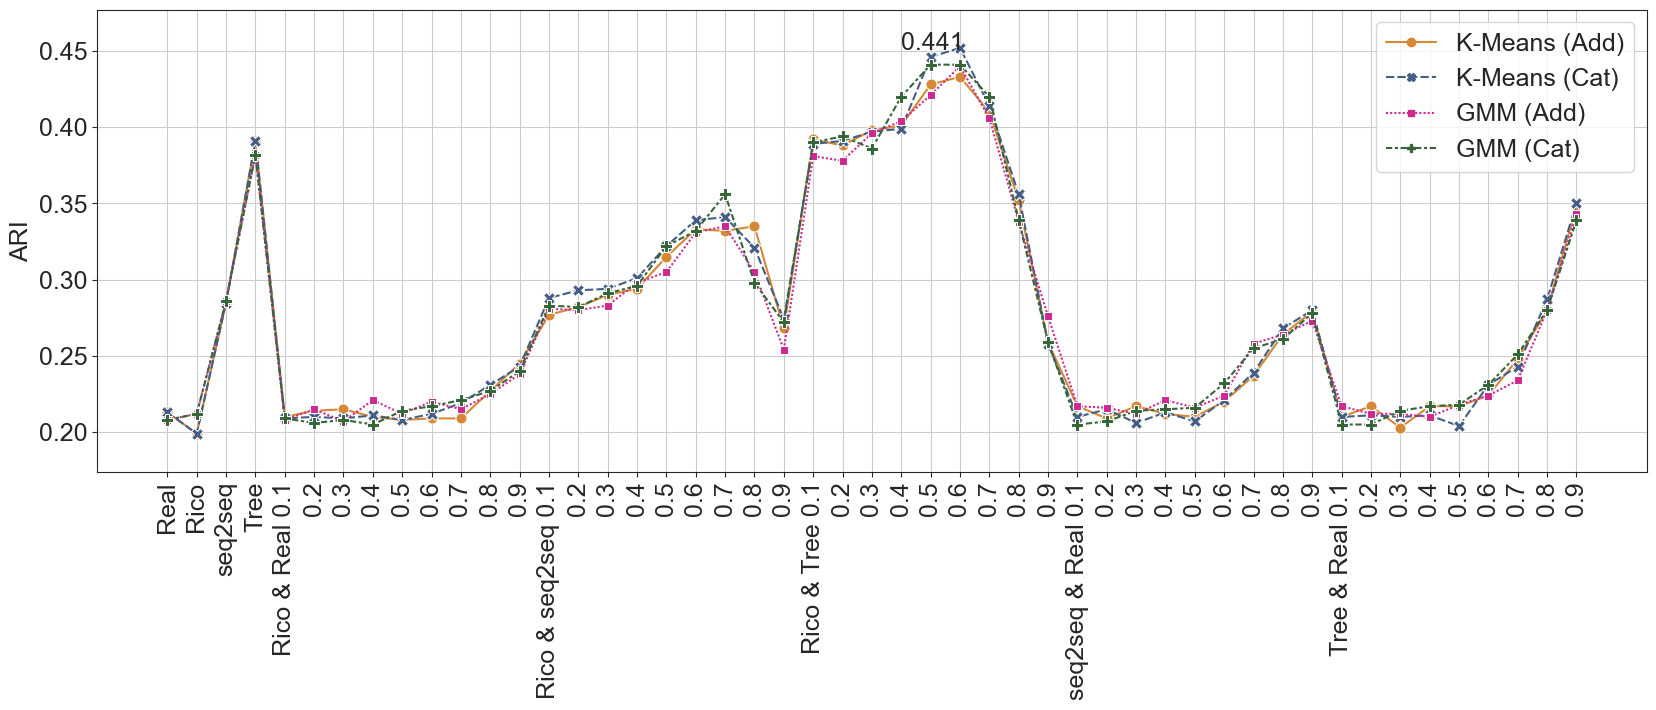

In [7]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
#plt.text(4, 0.104, 'Real & Semantic')
#plt.text(13, 0.104, 'Rico & Real')
#plt.text(22, 0.104, 'Rico & Semantic')
#plt.text(31, 0.104, 'Rico & seq2seq')
#plt.text(40, 0.104, 'seq2seq & Real')
#plt.text(49, 0.104, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
#plt.savefig('../result/plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)

In [8]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 26 0.647
1 26 0.659
2 27 0.645
3 26 0.649


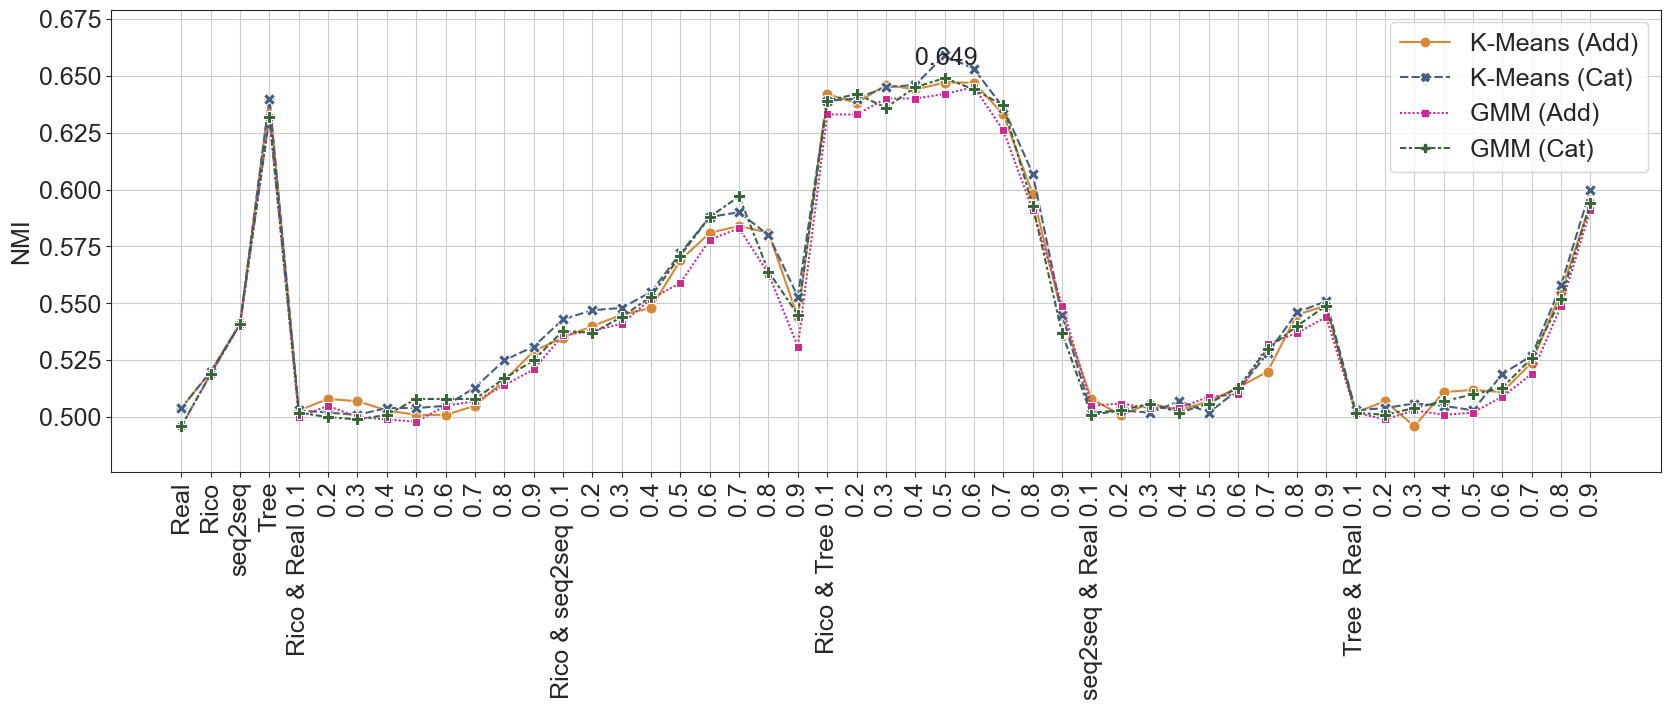

In [9]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
#plt.text(4, 0.411, 'Real & Semantic')
#plt.text(13, 0.411, 'Rico & Real')
#plt.text(22, 0.411, 'Rico & Semantic')
#plt.text(31, 0.411, 'Rico & seq2seq')
#plt.text(40, 0.411, 'seq2seq & Real')
#plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)

In [10]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 26 0.466
1 26 0.486
2 27 0.479
3 27 0.471


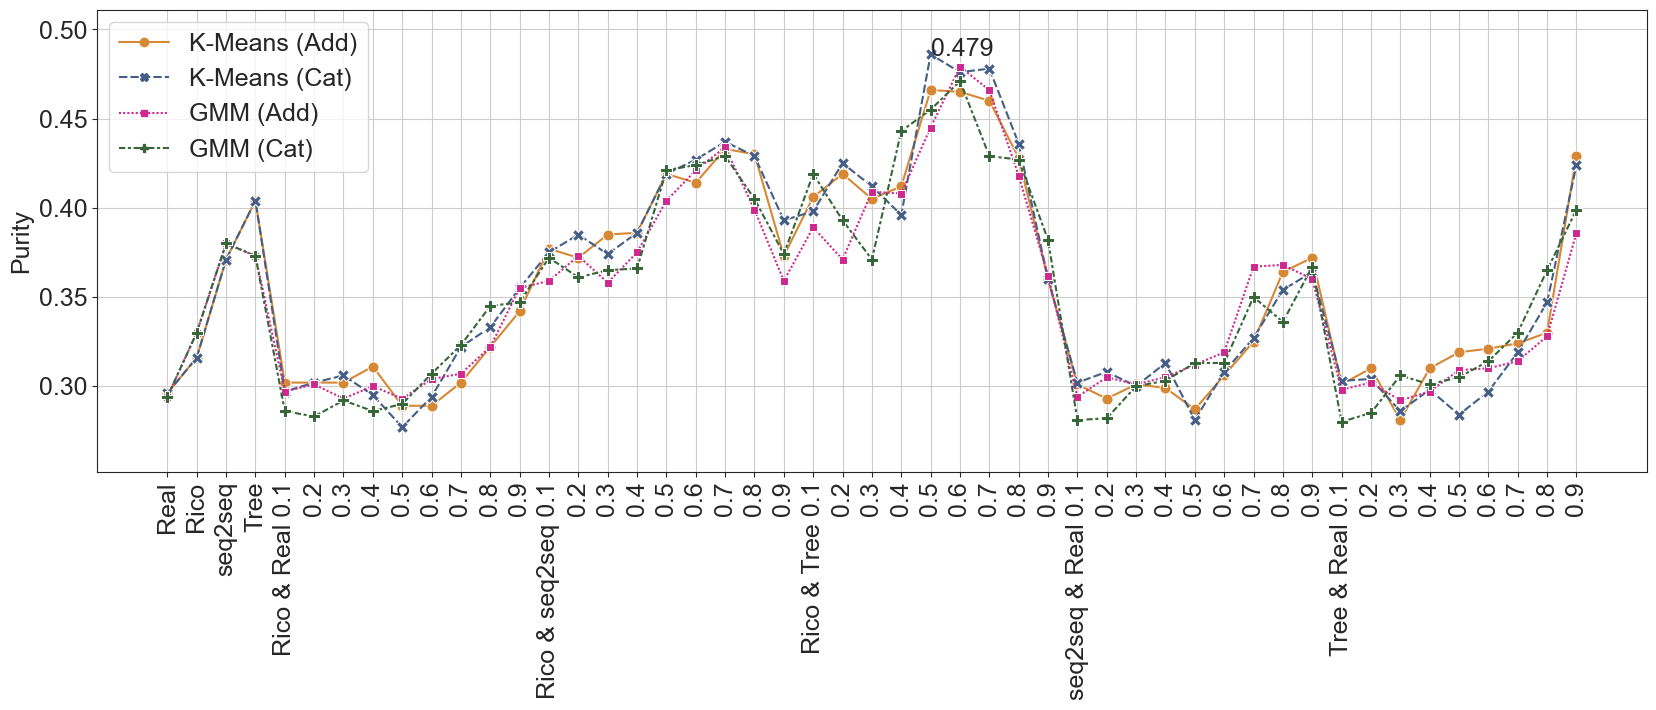

In [11]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
#plt.text(4, 0.166, 'Real & Semantic')
#plt.text(13, 0.166, 'Rico & Real')
#plt.text(22, 0.166, 'Rico & Semantic')
#plt.text(31, 0.166, 'Rico & seq2seq')
#plt.text(40, 0.166, 'seq2seq & Real')
#plt.text(49, 0.166, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i == 2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)

In [12]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 26 0.512
1 26 0.512
2 27 0.5
3 27 0.499


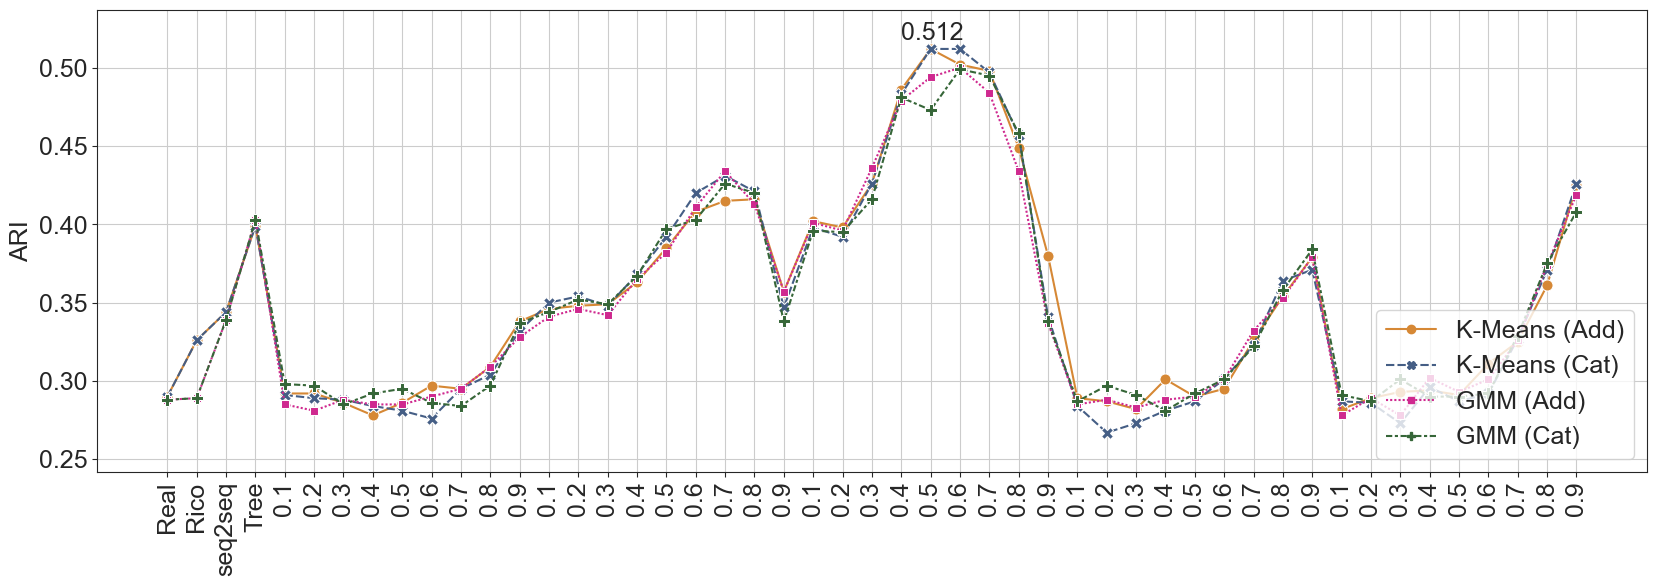

In [13]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
#plt.text(4, 0.128, 'Real & Semantic')
#plt.text(13, 0.128, 'Rico & Real')
#plt.text(22, 0.128, 'Rico & Semantic')
#plt.text(31, 0.128, 'Rico & seq2seq')
#plt.text(40, 0.128, 'seq2seq & Real')
#plt.text(49, 0.128, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)

In [14]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 26 0.712
1 26 0.711
2 26 0.706
3 27 0.707


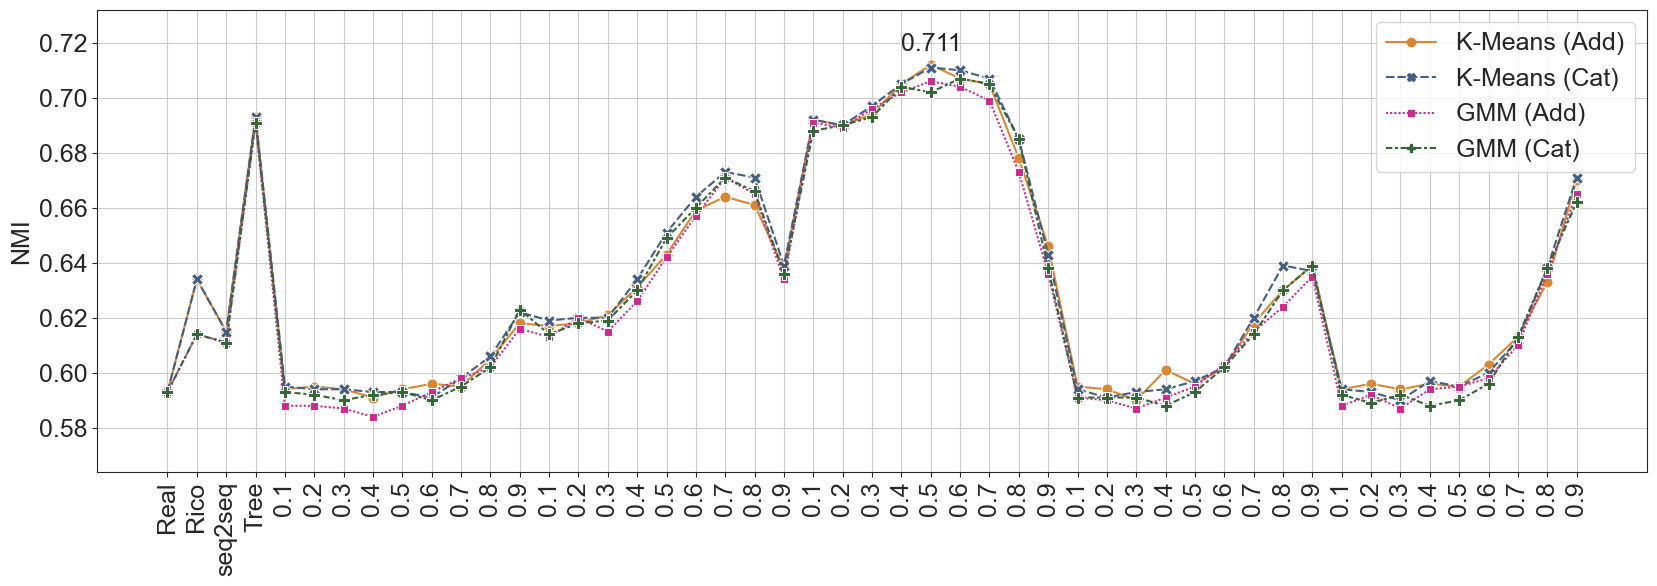

In [15]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
#plt.text(4, 0.468, 'Real & Semantic')
#plt.text(13, 0.468, 'Rico & Real')
#plt.text(22, 0.468, 'Rico & Semantic')
#plt.text(31, 0.468, 'Rico & seq2seq')
#plt.text(40, 0.468, 'seq2seq & Real')
#plt.text(49, 0.468, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i==1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)

In [16]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 28 0.47
1 25 0.438
2 26 0.449
3 28 0.443


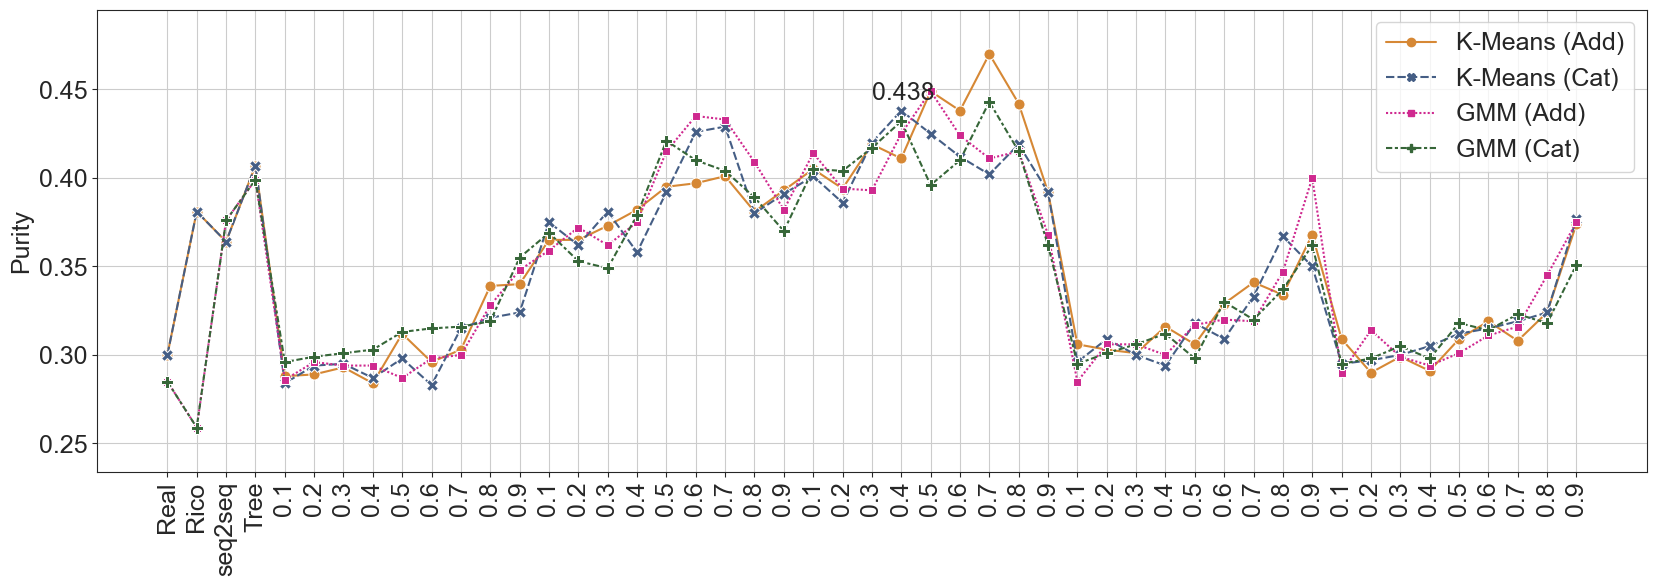

In [17]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
#plt.text(4, 0.22, 'Real & Semantic')
#plt.text(13, 0.22, 'Rico & Real')
#plt.text(22, 0.22, 'Rico & Semantic')
#plt.text(31, 0.22, 'Rico & seq2seq')
#plt.text(40, 0.22, 'seq2seq & Real')
#plt.text(49, 0.22, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)

In [18]:
labels_23 = ['C23 K-Means (Add)', 'C23 K-Means (Car)', 'C23 GMM (Add)', 'C23 GMM (Cat)']
labels_34 = ['R34 K-Means (Add)', 'R34 K-Means (Car)', 'R34 GMM (Add)', 'R34 GMM (Cat)']

df_ari_23_t = df_ari_23.copy(deep=True)
df_ari_23_t.columns = labels_23
df_ari_34_t = df_ari_34.copy(deep=True)
df_ari_34_t.columns = labels_34

df_nmi_23_t = df_nmi_23.copy(deep=True)
df_nmi_23_t.columns = labels_23
df_nmi_34_t = df_nmi_34.copy(deep=True)
df_nmi_34_t.columns = labels_34

df_purity_23_t = df_purity_23.copy(deep=True)
df_purity_23_t.columns = labels_23
df_purity_34_t = df_purity_34.copy(deep=True)
df_purity_34_t.columns = labels_34

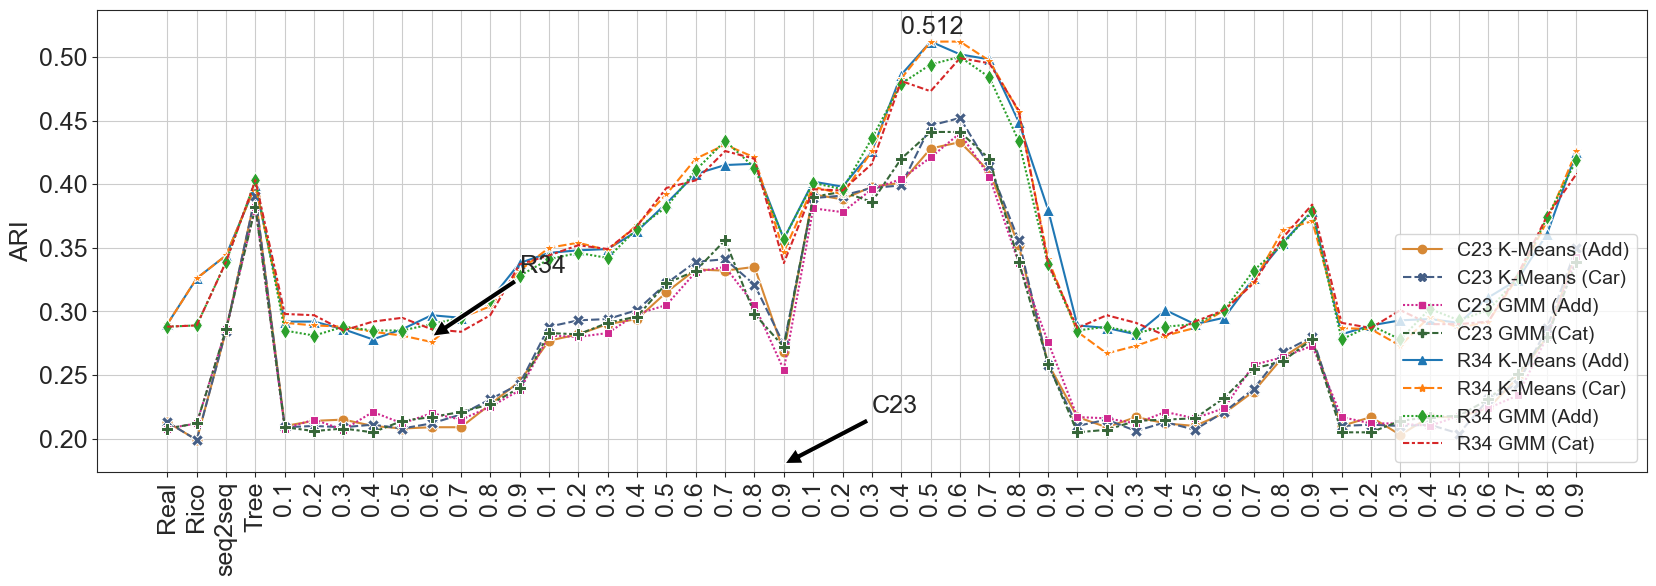

In [19]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_ari_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.28), xytext=(12, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.18), xytext=(24, 0.22), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.096, 'Real & Semantic')
#plt.text(13, 0.096, 'Rico & Real')
#plt.text(22, 0.096, 'Rico & Semantic')
#plt.text(31, 0.096, 'Rico & seq2seq')
#plt.text(40, 0.096, 'seq2seq & Real')
#plt.text(49, 0.096, 'seq2seq & Semantic')
plt.ylim([df_ari_23_t.min().min()-0.025, df_ari_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_ari_34_t.idxmax(), df_ari_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari.png', format='png', bbox_inches='tight', transparent=True)

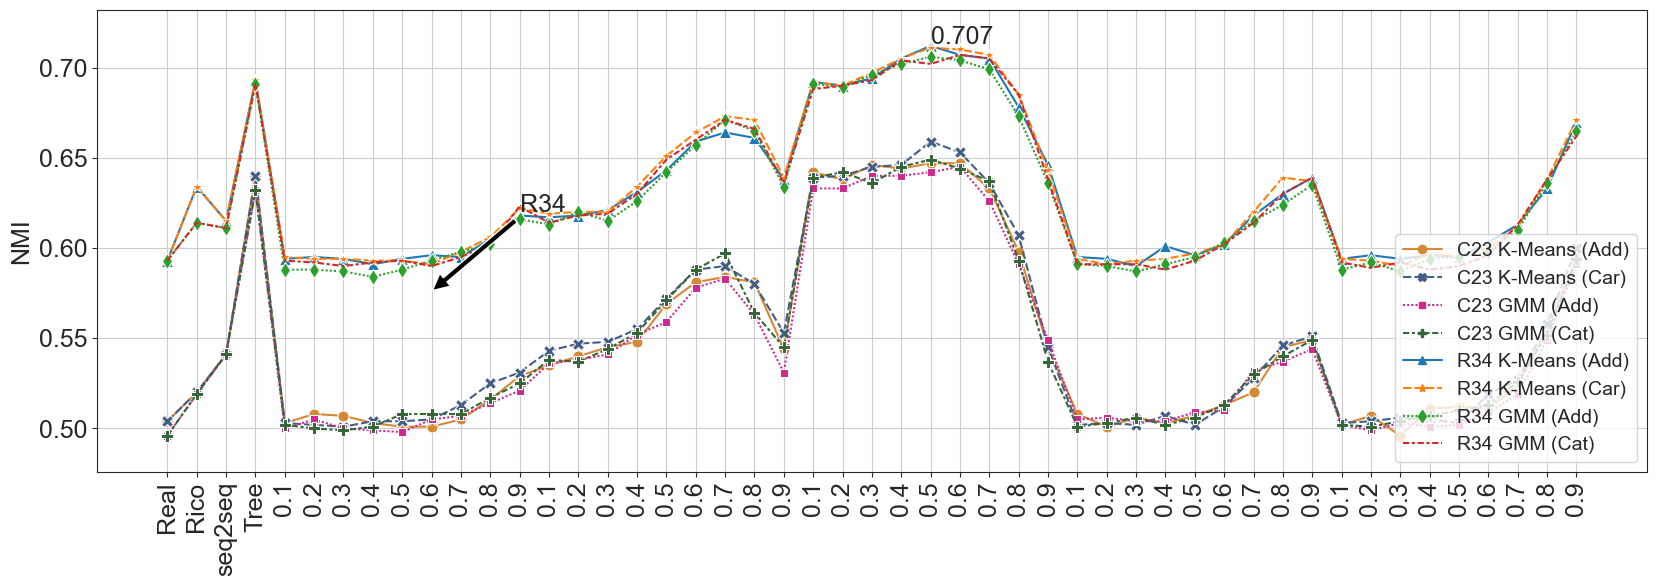

In [20]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_nmi_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.576), xytext=(12, 0.62), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.47), xytext=(24, 0.5), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.404, 'Real & Semantic')
#plt.text(13, 0.404, 'Rico & Real')
#plt.text(22, 0.404, 'Rico & Semantic')
#plt.text(31, 0.404, 'Rico & seq2seq')
#plt.text(40, 0.404, 'seq2seq & Real')
#plt.text(49, 0.404, 'seq2seq & Semantic')
plt.ylim([df_nmi_23_t.min().min()-0.02, df_nmi_34_t.max().max()+0.02])
for i, j in enumerate(zip(df_nmi_34_t.idxmax(), df_nmi_34_t.max())):
    if i==3: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi.png', format='png', bbox_inches='tight', transparent=True)


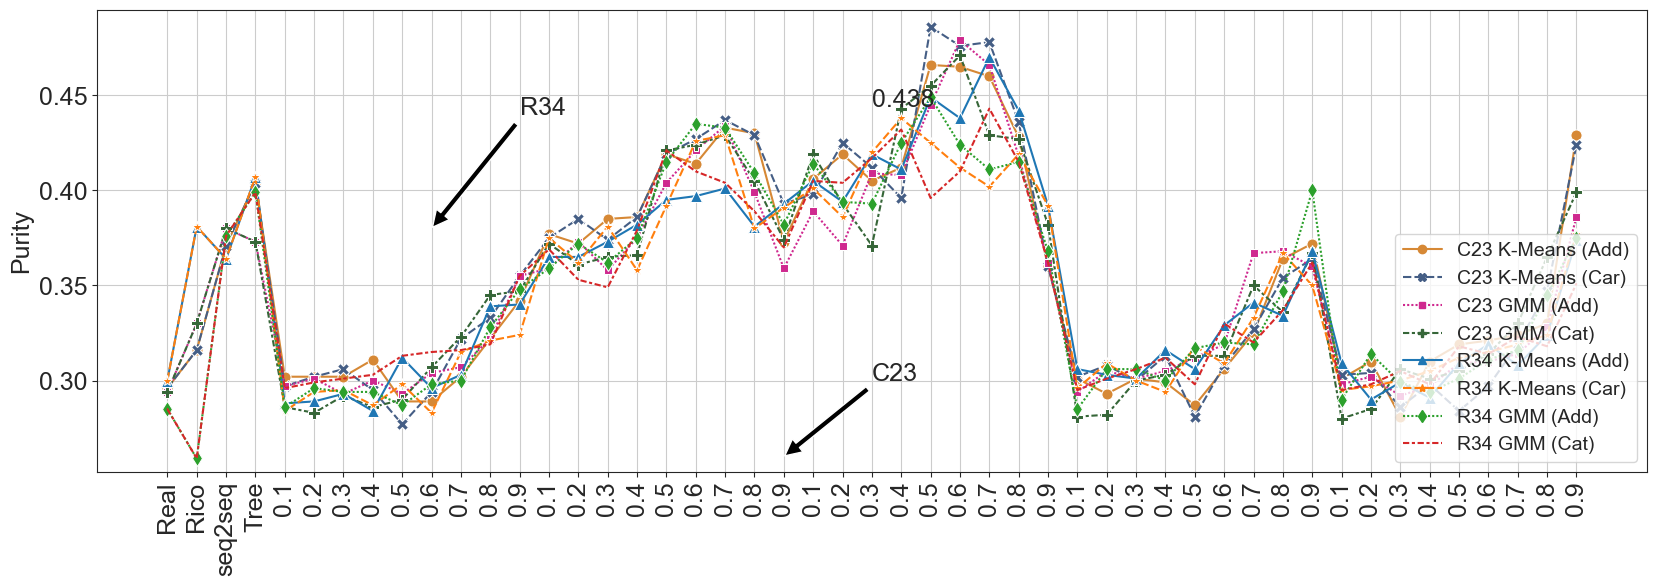

In [21]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_purity_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.38), xytext=(12, 0.44), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.26), xytext=(24, 0.3), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.154, 'Real & Semantic')
#plt.text(13, 0.154, 'Rico & Real')
#plt.text(22, 0.154, 'Rico & Semantic')
#plt.text(31, 0.154, 'Rico & seq2seq')
#plt.text(40, 0.154, 'seq2seq & Real')
#plt.text(49, 0.154, 'seq2seq & Semantic')
plt.ylim([df_purity_23_t.min().min()-0.025, df_purity_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_purity_34_t.idxmax(), df_purity_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity.png', format='png', bbox_inches='tight', transparent=True)

In [22]:
df_ari_23[0:4]['GMM (Add)']

0    0.208
1    0.212
2    0.286
3    0.382
Name: GMM (Add), dtype: float64

In [25]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Rico', 'seq2seq', 'Tree']
df_23 = pd.DataFrame([df_ari_23[0:4]['GMM (Add)'], df_ari_23[0:4]['K-Means (Add)'], df_nmi_23[0:4]['GMM (Add)'], df_nmi_23[0:4]['K-Means (Add)'], df_purity_23[0:4]['GMM (Add)'], df_purity_23[0:4]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")
#df_23.to_csv('../result/df_23_all.csv')

Text(0, 0.5, '')

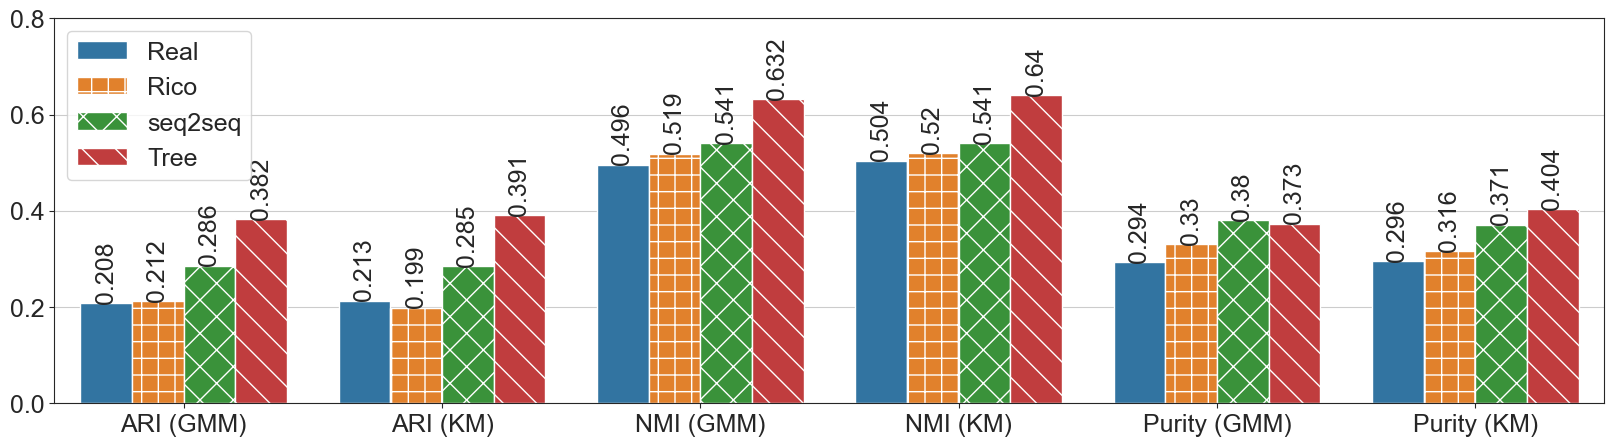

In [26]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [27]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Rico', 'seq2seq', 'Tree']
df_34 = pd.DataFrame([df_ari_34[0:4]['GMM (Add)'], df_ari_34[0:4]['K-Means (Add)'], df_nmi_34[0:4]['GMM (Add)'], df_nmi_34[0:4]['K-Means (Add)'], df_purity_34[0:4]['GMM (Add)'], df_purity_34[0:4]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")
#df_34.to_csv('../result/df_34_all.csv')

Text(0, 0.5, '')

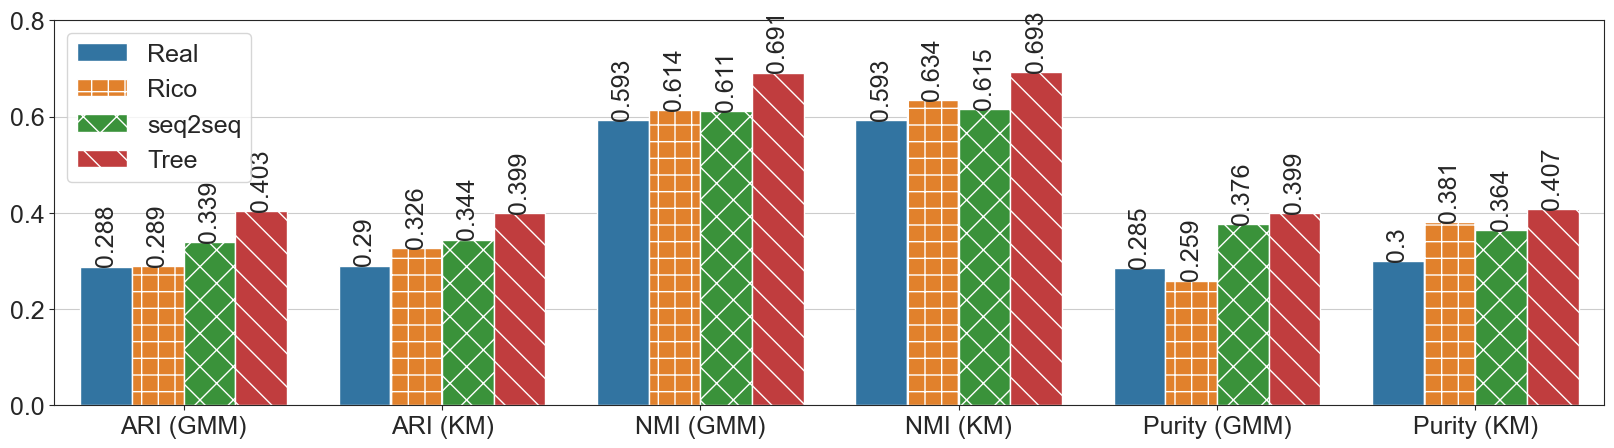

In [28]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


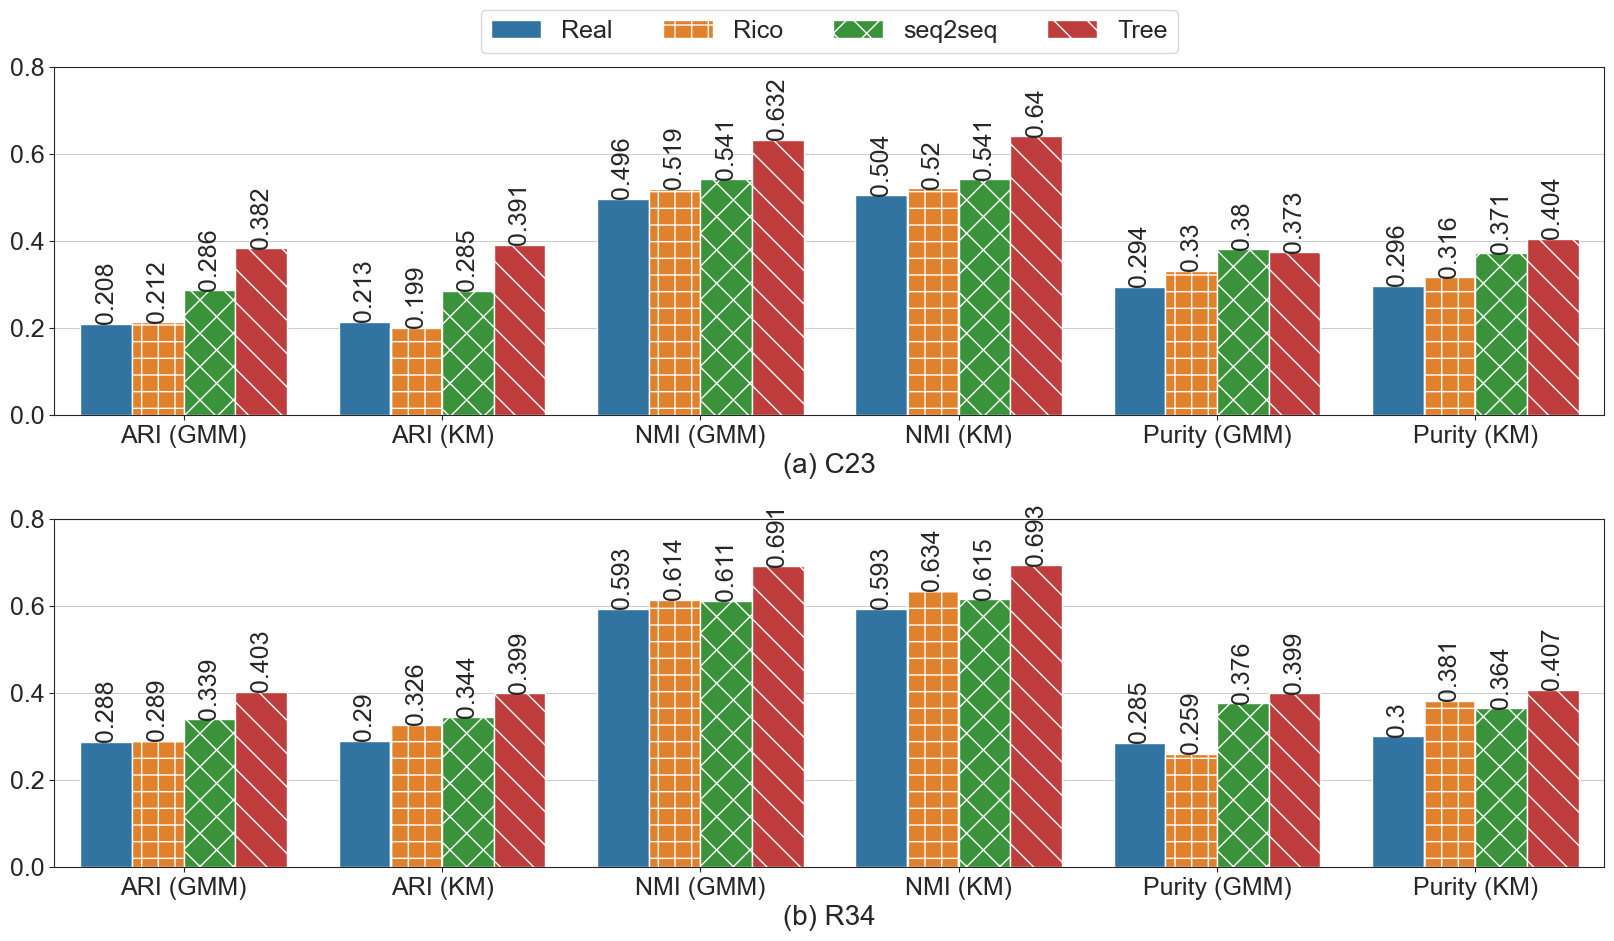

In [29]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.8))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.8))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 2.5))
plt.savefig('../result/plot_single_tree.png', format='png', bbox_inches='tight', transparent=True)
plt.savefig('../result/plot_single_tree.eps', format='eps', bbox_inches='tight')

In [53]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Rico', 'seq2seq', 'Tree']
df_23_1 = pd.DataFrame([df_ari_23.iloc[[0,2,3,4]]['GMM (Add)'], df_ari_23.iloc[[0,2,3,4]]['K-Means (Add)'], df_nmi_23.iloc[[0,2,3,4]]['GMM (Add)'], df_nmi_23.iloc[[0,2,3,4]]['K-Means (Add)'], df_purity_23.iloc[[0,2,3,4]]['GMM (Add)'], df_purity_23.iloc[[0,2,3,4]]['K-Means (Add)']])
df_23_1.columns = column_names
df_23_1 = df_23_1.T
df_23_1.columns = row_names
df_23_1['type'] = column_names
df_23_1 = pd.melt(df_23_1, id_vars="type", var_name="eval", value_name="eval_values")

row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Rico', 'seq2seq', 'Tree']
df_34_1 = pd.DataFrame([df_ari_34.iloc[[0,2,3,4]]['GMM (Add)'], df_ari_34.iloc[[0,2,3,4]]['K-Means (Add)'], df_nmi_34.iloc[[0,2,3,4]]['GMM (Add)'], df_nmi_34.iloc[[0,2,3,4]]['K-Means (Add)'], df_purity_34.iloc[[0,2,3,4]]['GMM (Add)'], df_purity_34.iloc[[0,2,3,4]]['K-Means (Add)']])
df_34_1.columns = column_names
df_34_1 = df_34_1.T
df_34_1.columns = row_names
df_34_1['type'] = column_names
df_34_1 = pd.melt(df_34_1, id_vars="type", var_name="eval", value_name="eval_values")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


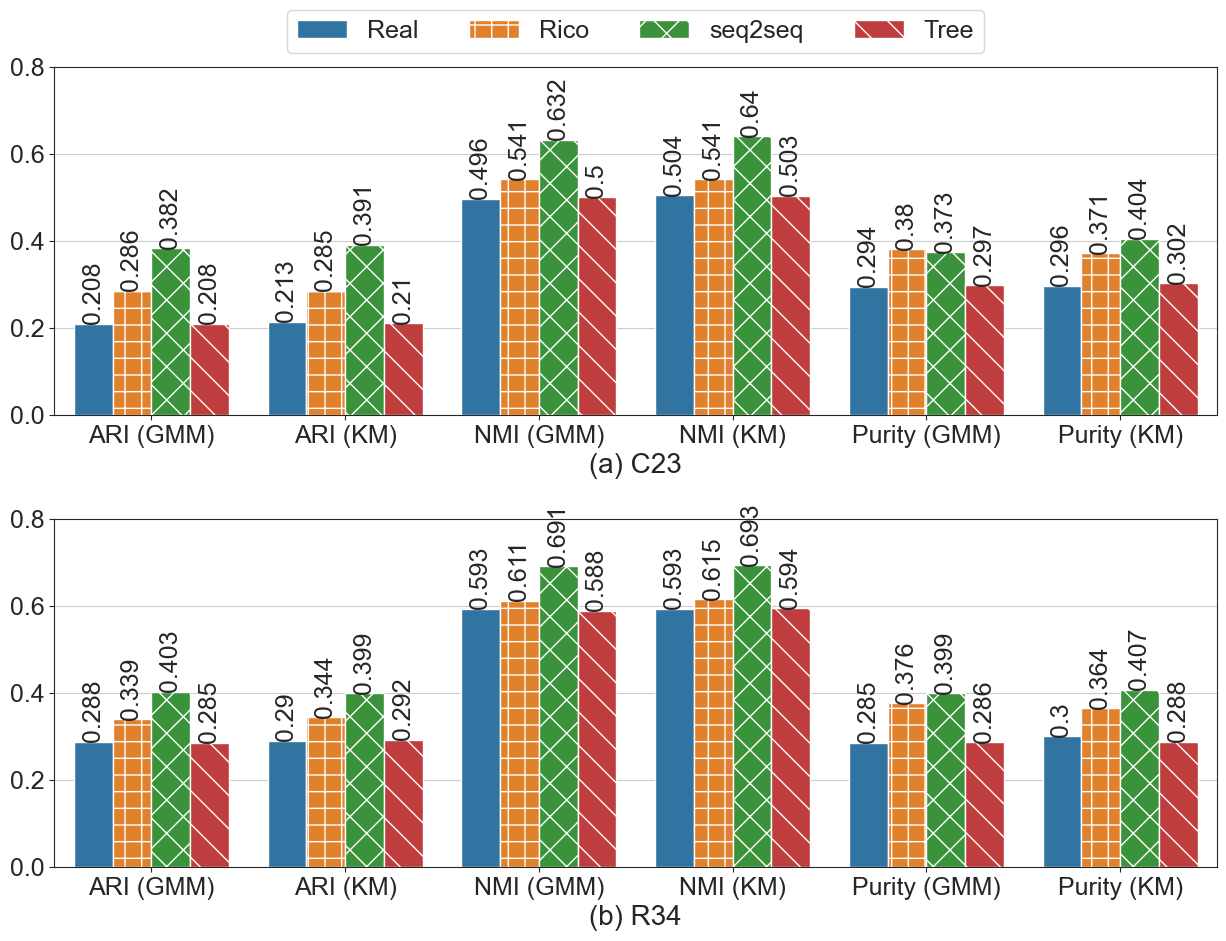

In [54]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23_1, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', 'o', '*']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.8))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34_1, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.8))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 2.5))
plt.savefig('../result/plot_single_tree_1.png', format='png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../result/plot_single_tree_1.eps', format='eps', bbox_inches='tight')

In [55]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.213          0.213      0.208      0.208
Rico             0.199          0.199      0.212      0.212
seq2seq          0.285          0.285      0.286      0.286
Tree             0.391          0.391      0.382      0.382
0.1              0.210          0.209      0.208      0.209

Text(0.5, 0, 'Rico & Tree')

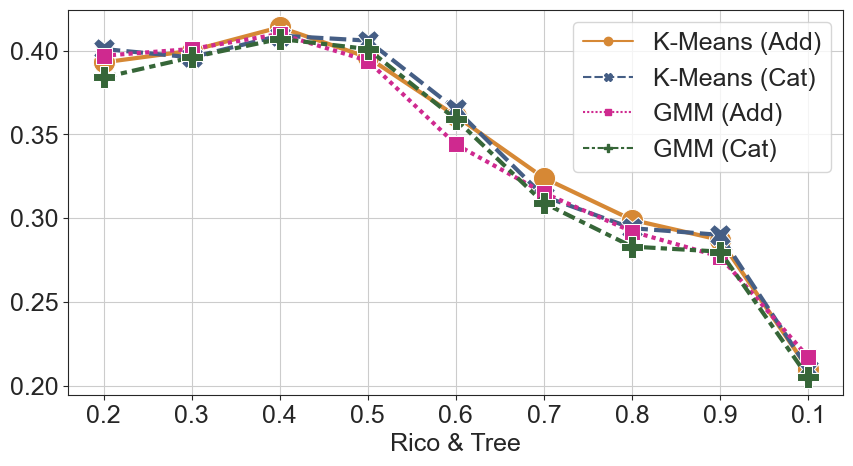

In [56]:
# real & tree
df_ari_23_x[4:13]
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
# label font size
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_ari_re_se_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\3814419317.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ari_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

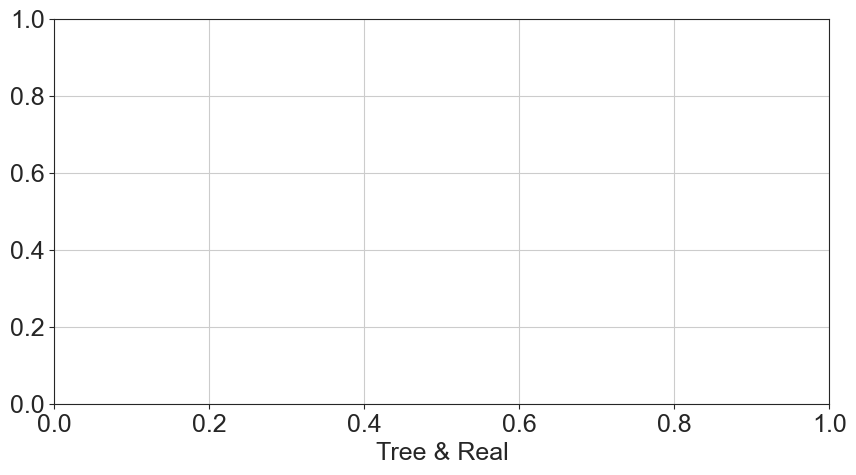

In [57]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_ari_rico_re_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\1157635529.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ari_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

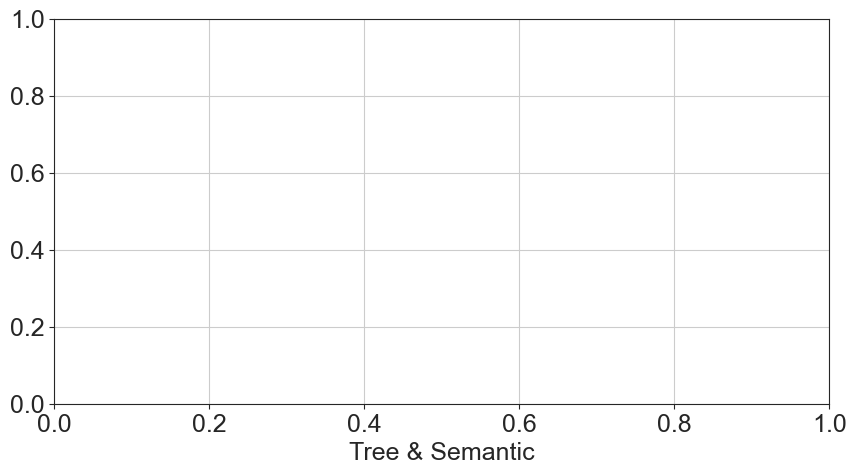

In [58]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_ari_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [59]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.504          0.504      0.496      0.496
Rico             0.520          0.520      0.519      0.519
seq2seq          0.541          0.541      0.541      0.541
Tree             0.640          0.640      0.632      0.632
0.1              0.503          0.503      0.500      0.502

Text(0.5, 0, 'Rico & Tree')

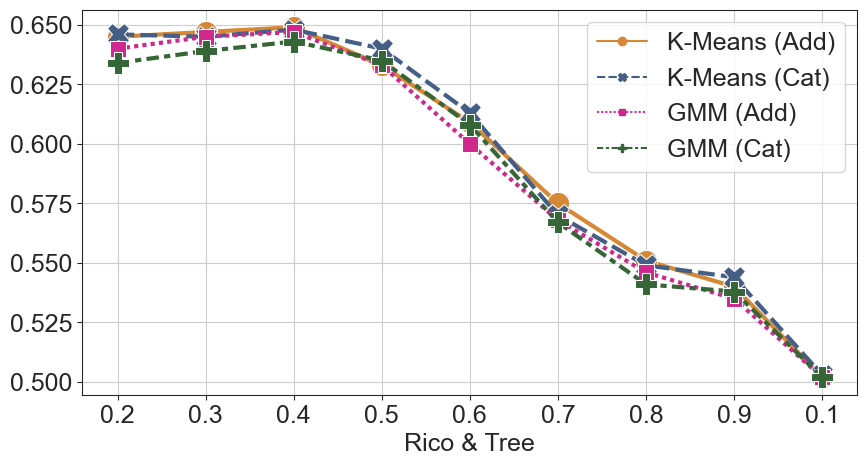

In [60]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_nmi_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\3947304474.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_nmi_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

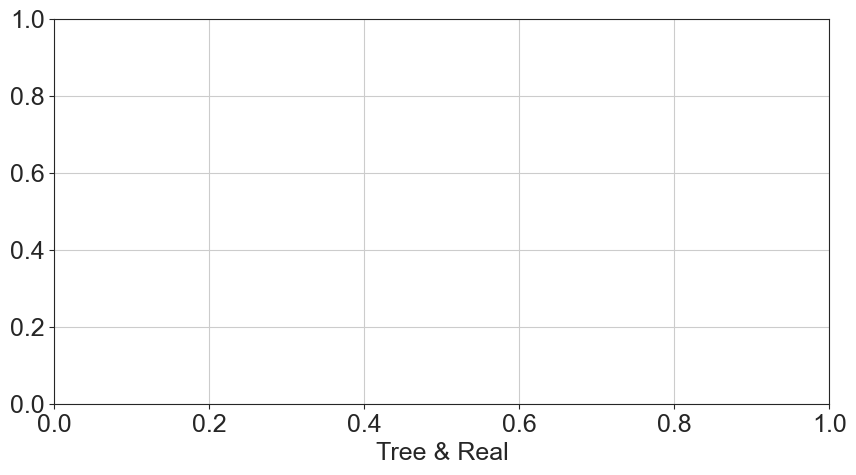

In [61]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_nmi_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\1334346960.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_nmi_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

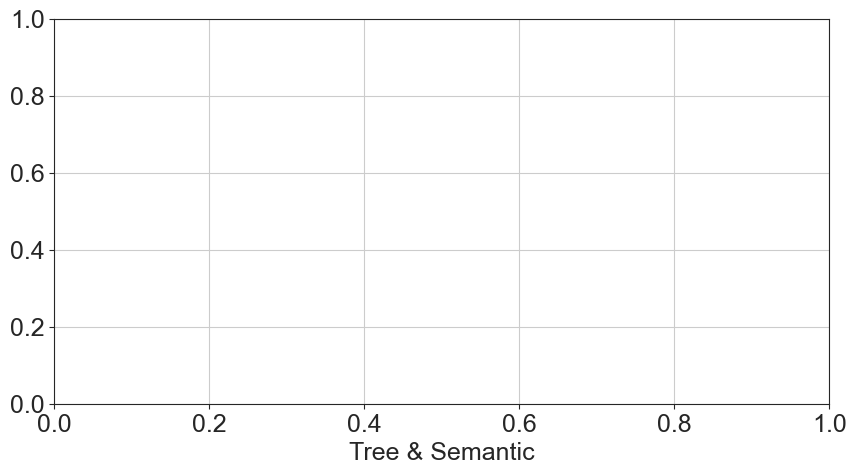

In [62]:
# Tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [63]:
df_purity_23_x = df_purity_23.copy()
df_purity_23_x['label'] = labels_x
df_purity_23_x.set_index('label', inplace=True)
df_purity_23_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.296          0.296      0.294      0.294
Rico             0.316          0.316      0.330      0.330
seq2seq          0.371          0.371      0.380      0.380
Tree             0.404          0.404      0.373      0.373
0.1              0.302          0.297      0.297      0.286

Text(0.5, 0, 'Rico & Tree')

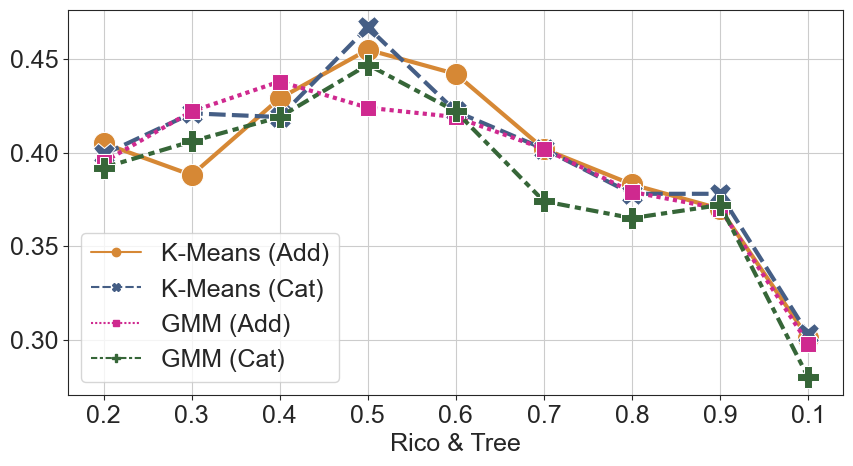

In [64]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_purity_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\1792861880.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_purity_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

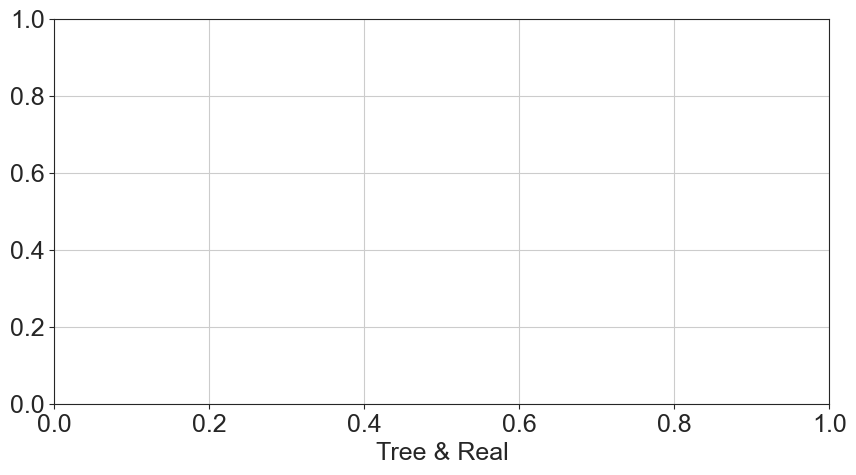

In [65]:
# Tree & Real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_purity_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\2208452959.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_purity_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

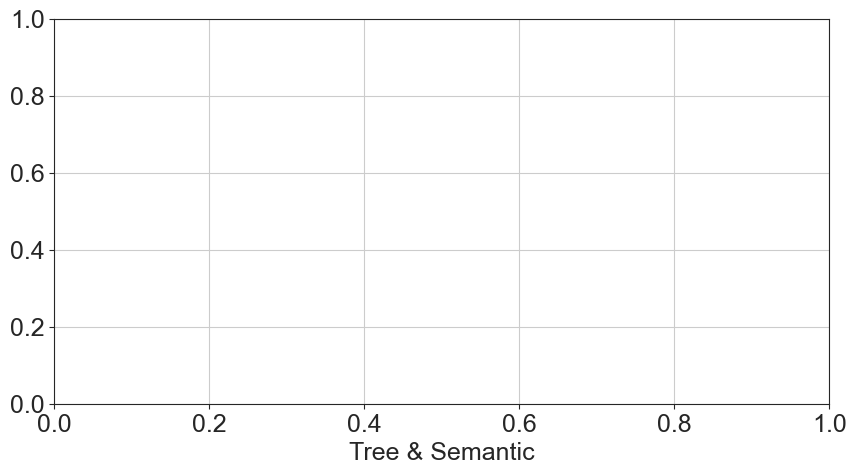

In [66]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [67]:
df_ari_34_x = df_ari_34.copy()
df_ari_34_x['label'] = labels_x
df_ari_34_x.set_index('label', inplace=True)
df_ari_34_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.290          0.290      0.288      0.288
Rico             0.326          0.326      0.289      0.289
seq2seq          0.344          0.344      0.339      0.339
Tree             0.399          0.399      0.403      0.403
0.1              0.292          0.291      0.285      0.298

In [68]:
df_nmi_34_x = df_nmi_34.copy()
df_nmi_34_x['label'] = labels_x
df_nmi_34_x.set_index('label', inplace=True)
df_nmi_34_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.593          0.593      0.593      0.593
Rico             0.634          0.634      0.614      0.614
seq2seq          0.615          0.615      0.611      0.611
Tree             0.693          0.693      0.691      0.691
0.1              0.594          0.595      0.588      0.593

In [69]:
df_purity_34_x = df_purity_34.copy()
df_purity_34_x['label'] = labels_x
df_purity_34_x.set_index('label', inplace=True)
df_purity_34_x.head(5)

K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
label                                                      
Real             0.300          0.300      0.285      0.285
Rico             0.381          0.381      0.259      0.259
seq2seq          0.364          0.364      0.376      0.376
Tree             0.407          0.407      0.399      0.399
0.1              0.288          0.284      0.286      0.296

Text(0.5, 0, 'Rico & Tree')

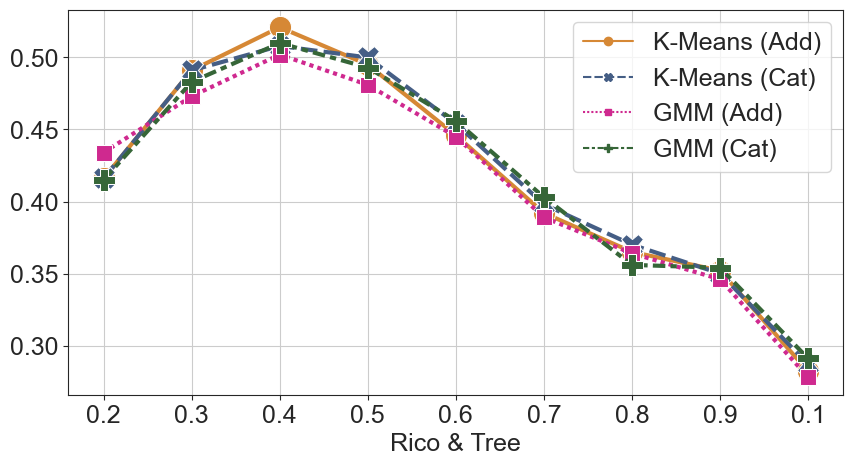

In [70]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_ari_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\1692600515.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ari_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

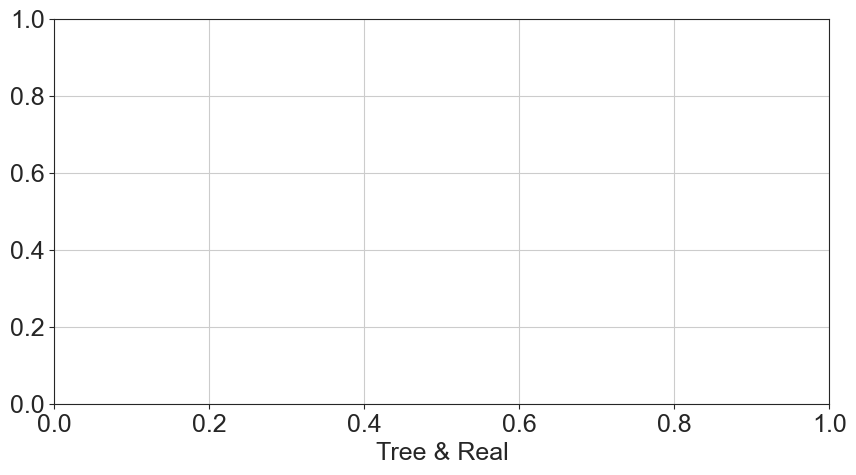

In [71]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_ari_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\2573771966.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ari_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

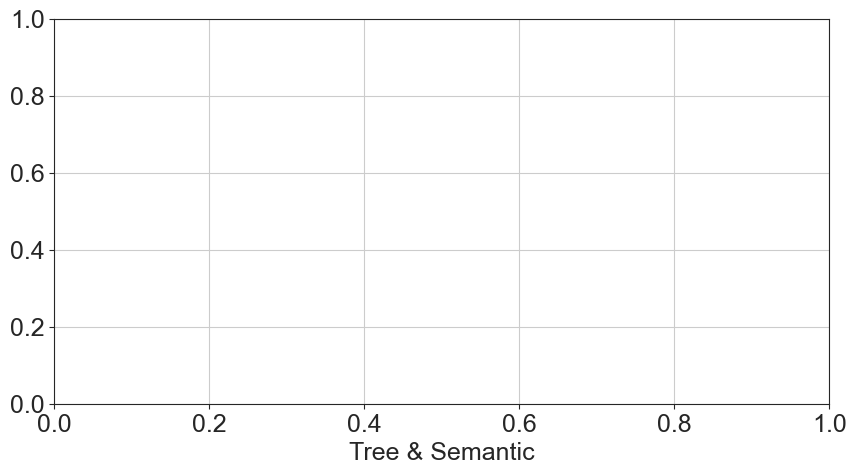

In [72]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_ari_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Rico & Tree')

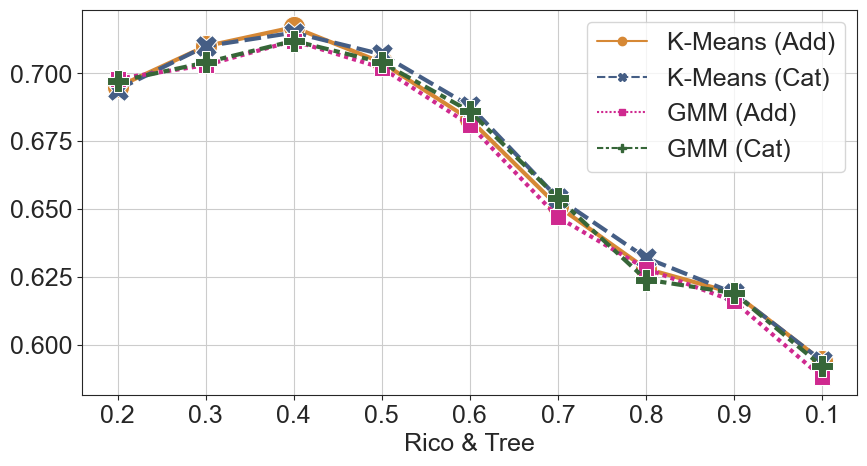

In [73]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_nmi_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\2306646008.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_nmi_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

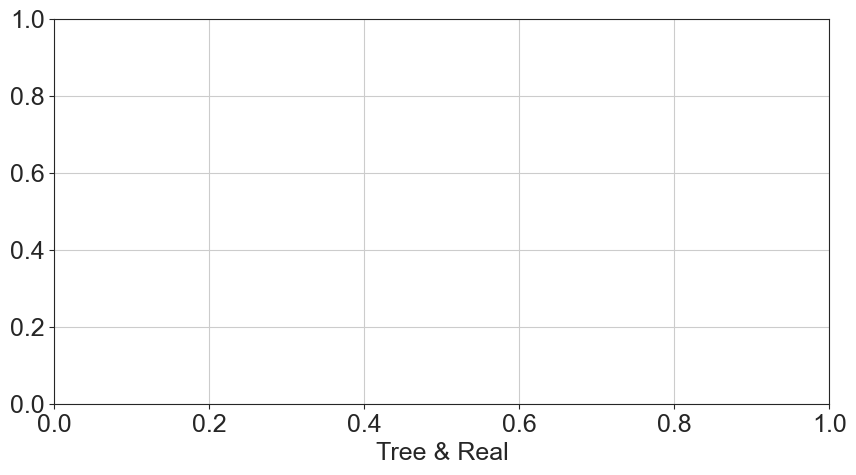

In [74]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_nmi_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\2847223525.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_nmi_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

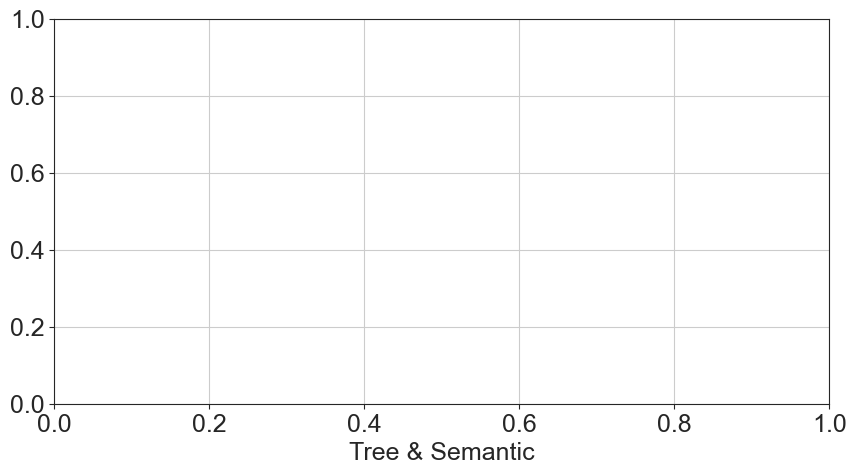

In [75]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Rico & Tree')

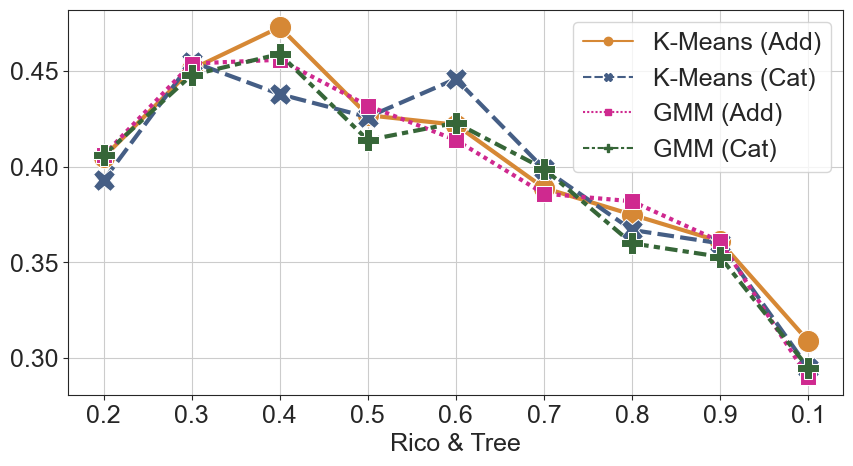

In [76]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_purity_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\2329559816.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_purity_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Real')

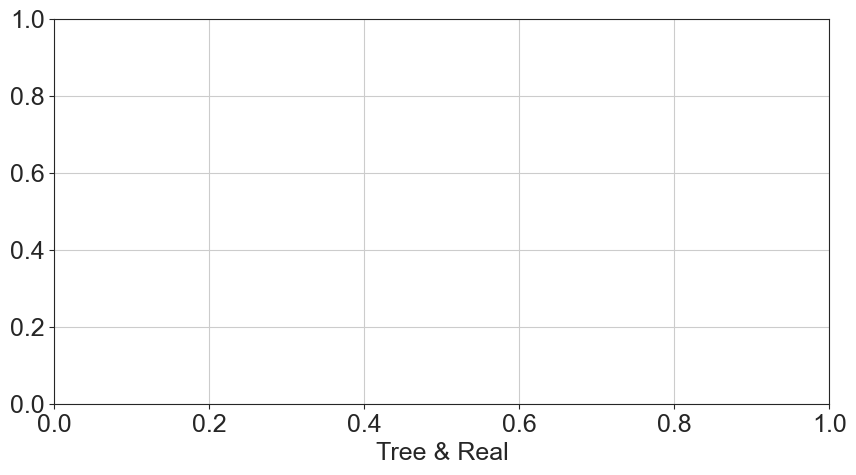

In [77]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_purity_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23952\3125664344.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_purity_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)


Text(0.5, 0, 'Tree & Semantic')

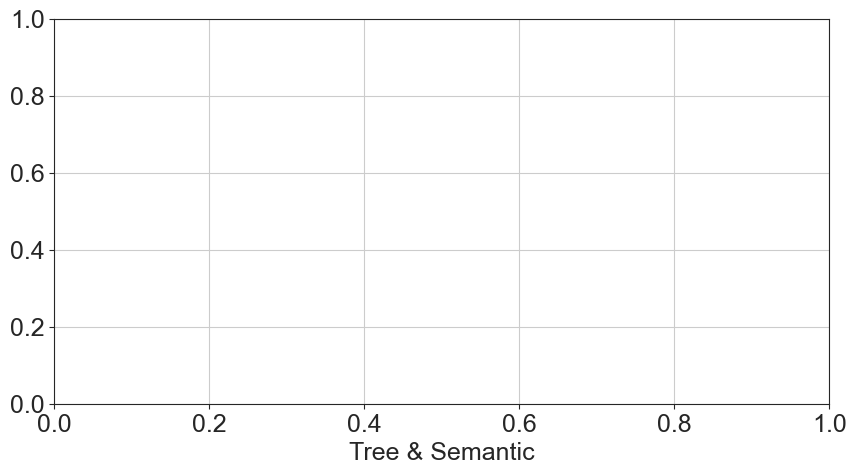

In [78]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

NameError: name 'df_ari_23_x' is not defined

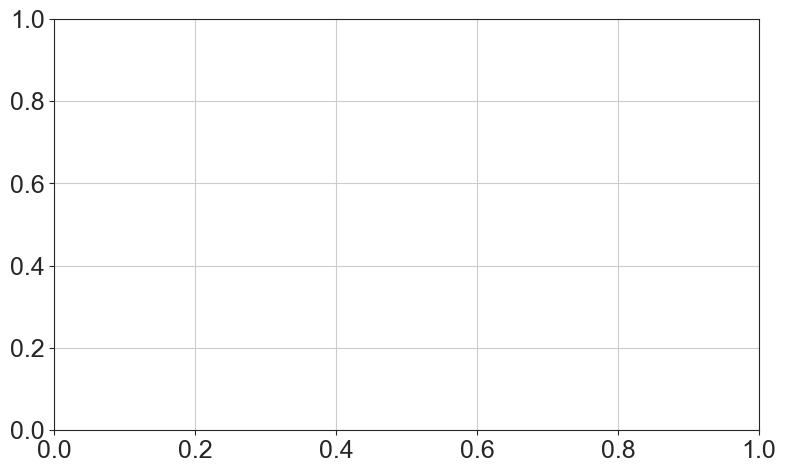

In [30]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.25)
colors = ['#D68835', '#455E85', '#CF298F', '#366638']

plt.subplot(3, 2, 1)
sns.lineplot(data=df_ari_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(a) Rico & Tree ARI (C23)')

plt.subplot(3, 2, 3)
sns.lineplot(data=df_nmi_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(c) Rico & Tree NMI (C23)')

plt.subplot(3, 2, 5)
sns.lineplot(data=df_purity_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(e) Rico & Tree Purity (C23)')

plt.subplot(3, 2, 2)
sns.lineplot(data=df_ari_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(b) Rico & Tree ARI (R34)')

plt.subplot(3, 2, 4)
sns.lineplot(data=df_nmi_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(d) Rico & Tree NMI (R34)')

plt.subplot(3, 2, 6)
sns.lineplot(data=df_purity_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('(f) Rico & Tree Purity (R34)')

plt.savefig('../result/plot_rico_tree_ari_nmi_purity.eps', format='eps', bbox_inches='tight', transparent=True)
plt.savefig('../result/plot_rico_tree_ari_nmi_purity.png', format='png', bbox_inches='tight', transparent=True, dpi=300)


In [80]:
print(df_ari_23_x[41:50].max())
print(df_ari_23_x[68:77].max())
print(df_ari_23_x[77:86].max())

K-Means (Add)    0.414
K-Means (Cat)    0.409
GMM (Add)        0.410
GMM (Cat)        0.407
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [81]:
print(df_nmi_23_x[41:50].max())
print(df_nmi_23_x[68:77].max())
print(df_nmi_23_x[77:86].max())

K-Means (Add)    0.649
K-Means (Cat)    0.648
GMM (Add)        0.647
GMM (Cat)        0.643
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [82]:
print(df_purity_23_x[41:50].max())
print(df_purity_23_x[68:77].max())
print(df_purity_23_x[77:86].max())

K-Means (Add)    0.455
K-Means (Cat)    0.467
GMM (Add)        0.438
GMM (Cat)        0.447
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [83]:
print(df_ari_34_x[41:50].max())
print(df_ari_34_x[68:77].max())
print(df_ari_34_x[77:86].max())

K-Means (Add)    0.521
K-Means (Cat)    0.508
GMM (Add)        0.502
GMM (Cat)        0.510
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [84]:
print(df_nmi_34_x[41:50].max())
print(df_nmi_34_x[68:77].max())
print(df_nmi_34_x[77:86].max())

K-Means (Add)    0.717
K-Means (Cat)    0.715
GMM (Add)        0.712
GMM (Cat)        0.712
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [85]:
print(df_purity_34_x[41:50].max())
print(df_purity_34_x[68:77].max())
print(df_purity_34_x[77:86].max())

K-Means (Add)    0.473
K-Means (Cat)    0.455
GMM (Add)        0.456
GMM (Cat)        0.459
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64
K-Means (Add)   NaN
K-Means (Cat)   NaN
GMM (Add)       NaN
GMM (Cat)       NaN
dtype: float64


In [86]:
df_ari_23_a = df_ari_23.copy()
df_ari_23_a['label'] = labels_a
df_ari_23_a.set_index('label', inplace=True)
#df_ari_23_a.head(5)
print(df_ari_23_a['K-Means (Add)'].nlargest(n=5), df_ari_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_23_a['GMM (Add)'].nlargest(n=5), df_ari_23_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.6       0.433
Rico & Tree 0.5       0.428
seq2seq & Real 0.4    0.414
Rico & Tree 0.7       0.410
Rico & Tree 0.4       0.401
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.6       0.452
Rico & Tree 0.5       0.446
Rico & Tree 0.7       0.414
seq2seq & Real 0.4    0.409
seq2seq & Real 0.5    0.406
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.6       0.440
Rico & Tree 0.5       0.421
seq2seq & Real 0.4    0.410
Rico & Tree 0.7       0.406
Rico & Tree 0.4       0.404
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.5       0.441
Rico & Tree 0.6       0.441
Rico & Tree 0.4       0.420
Rico & Tree 0.7       0.420
seq2seq & Real 0.4    0.407
Name: GMM (Cat), dtype: float64


In [87]:
df_ari_34_a = df_ari_34.copy()
df_ari_34_a['label'] = labels_a
df_ari_34_a.set_index('label', inplace=True)
print(df_ari_34_a['K-Means (Add)'].nlargest(n=5), df_ari_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_34_a['GMM (Add)'].nlargest(n=5), df_ari_34_a['GMM (Cat)'].nlargest(n=5))

label
seq2seq & Real 0.4    0.521
Rico & Tree 0.5       0.512
Rico & Tree 0.6       0.502
Rico & Tree 0.7       0.498
seq2seq & Real 0.5    0.495
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.512
Rico & Tree 0.6       0.512
seq2seq & Real 0.4    0.508
seq2seq & Real 0.5    0.500
Rico & Tree 0.7       0.497
Name: K-Means (Cat), dtype: float64
label
seq2seq & Real 0.4    0.502
Rico & Tree 0.6       0.500
Rico & Tree 0.5       0.494
Rico & Tree 0.7       0.484
seq2seq & Real 0.5    0.481
Name: GMM (Add), dtype: float64 label
seq2seq & Real 0.4    0.510
Rico & Tree 0.6       0.499
Rico & Tree 0.7       0.495
seq2seq & Real 0.5    0.493
seq2seq & Real 0.3    0.483
Name: GMM (Cat), dtype: float64


In [88]:
df_nmi_23_a = df_nmi_23.copy()
df_nmi_23_a['label'] = labels_a
df_nmi_23_a.set_index('label', inplace=True)
print(df_nmi_23_a['K-Means (Add)'].nlargest(n=5), df_nmi_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_23_a['GMM (Add)'].nlargest(n=5), df_nmi_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_nmi_34_a = df_nmi_34.copy()
df_nmi_34_a['label'] = labels_a
df_nmi_34_a.set_index('label', inplace=True)
print(df_nmi_34_a['K-Means (Add)'].nlargest(n=5), df_nmi_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_34_a['GMM (Add)'].nlargest(n=5), df_nmi_34_a['GMM (Cat)'].nlargest(n=5))

label
seq2seq & Real 0.4    0.649
Rico & Tree 0.5       0.647
Rico & Tree 0.6       0.647
seq2seq & Real 0.3    0.647
Rico & Tree 0.3       0.646
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.659
Rico & Tree 0.6       0.653
seq2seq & Real 0.4    0.648
Rico & Tree 0.4       0.646
seq2seq & Real 0.2    0.646
Name: K-Means (Cat), dtype: float64
label
seq2seq & Real 0.4    0.647
Rico & Tree 0.6       0.645
seq2seq & Real 0.3    0.645
seq2seq & Real 0.1    0.644
Rico & Tree 0.5       0.642
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.5       0.649
Rico & Tree 0.4       0.645
Rico & Tree 0.6       0.644
seq2seq & Real 0.4    0.643
Rico & Tree 0.2       0.642
Name: GMM (Cat), dtype: float64
--
label
seq2seq & Real 0.4    0.717
Rico & Tree 0.5       0.712
seq2seq & Real 0.3    0.710
Rico & Tree 0.6       0.707
Rico & Tree 0.4       0.705
Name: K-Means (Add), dtype: float64 label
seq2seq & Real 0.4    0.715
Rico & Tree 0.5       0.711
Rico & Tree 0.6       0.710
seq2s

In [89]:
df_purity_23_a = df_purity_23.copy()
df_purity_23_a['label'] = labels_a
df_purity_23_a.set_index('label', inplace=True)
print(df_purity_23_a['K-Means (Add)'].nlargest(n=5), df_purity_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_23_a['GMM (Add)'].nlargest(n=5), df_purity_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_purity_34_a = df_purity_34.copy()
df_purity_34_a['label'] = labels_a
df_purity_34_a.set_index('label', inplace=True)
print(df_purity_34_a['K-Means (Add)'].nlargest(n=5), df_purity_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_34_a['GMM (Add)'].nlargest(n=5), df_purity_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.5       0.466
Rico & Tree 0.6       0.465
Rico & Tree 0.7       0.460
seq2seq & Real 0.5    0.455
seq2seq & Real 0.6    0.442
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.486
Rico & Tree 0.7       0.478
Rico & Tree 0.6       0.476
seq2seq & Real 0.5    0.467
Rico & seq2seq 0.7    0.437
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.6       0.479
Rico & Tree 0.7       0.466
Rico & Tree 0.5       0.445
seq2seq & Real 0.4    0.438
Rico & seq2seq 0.7    0.434
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.6       0.471
Rico & Tree 0.5       0.455
seq2seq & Real 0.5    0.447
Rico & Tree 0.4       0.443
Rico & seq2seq 0.7    0.429
Name: GMM (Cat), dtype: float64
--
label
seq2seq & Real 0.4    0.473
Rico & Tree 0.7       0.470
seq2seq & Real 0.3    0.451
Rico & Tree 0.5       0.449
Rico & Tree 0.8       0.442
Name: K-Means (Add), dtype: float64 label
seq2seq & Real 0.3    0.455
seq2seq & Real 0.6    0.446
Rico & Tree 0.4       0.438
seq2s

In [90]:
df_ari_23_a[32:41].max().max()

0.399

In [91]:
max_name = ['seq2seq & Rico', 'Tree & Rico', 'seq2seq & Real', 'Tree & Real',  'seq2seq & Semantic', 'Tree & Semantic']
df_ari_23_max = pd.DataFrame([df_ari_23_a[32:41].max().max(), df_ari_23_a[41:50].max().max(), df_ari_23_a[50:59].max().max(), df_ari_23_a[68:77].max().max(), df_ari_23_a[59:68].max().max(), df_ari_23_a[77:86].max().max()])
df_nmi_23_max = pd.DataFrame([df_nmi_23_a[32:41].max().max(), df_nmi_23_a[41:50].max().max(), df_nmi_23_a[50:59].max().max(), df_nmi_23_a[68:77].max().max(), df_nmi_23_a[59:68].max().max(), df_nmi_23_a[77:86].max().max()])
df_purity_23_max = pd.DataFrame([df_purity_23_a[32:41].max().max(), df_purity_23_a[41:50].max().max(), df_purity_23_a[50:59].max().max(), df_purity_23_a[68:77].max().max(), df_purity_23_a[59:68].max().max(), df_purity_23_a[77:86].max().max()])
df_23_max = pd.concat([df_ari_23_max, df_nmi_23_max],axis=1)
df_23_max = pd.concat([df_23_max, df_purity_23_max],axis=1)
df_23_max.columns = ['ARI', 'NMI', 'Purity']
df_23_max['type'] = max_name
df_23_max = pd.melt(df_23_max, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_max = pd.DataFrame([df_ari_34_a[32:41].max().max(), df_ari_34_a[41:50].max().max(), df_ari_34_a[50:59].max().max(), df_ari_34_a[68:77].max().max(), df_ari_34_a[59:68].max().max(), df_ari_34_a[77:86].max().max()])
df_nmi_34_max = pd.DataFrame([df_nmi_34_a[32:41].max().max(), df_nmi_34_a[41:50].max().max(), df_nmi_34_a[50:59].max().max(), df_nmi_34_a[68:77].max().max(), df_nmi_34_a[59:68].max().max(), df_nmi_34_a[77:86].max().max()])
df_purity_34_max = pd.DataFrame([df_purity_34_a[32:41].max().max(), df_purity_34_a[41:50].max().max(), df_purity_34_a[50:59].max().max(), df_purity_34_a[68:77].max().max(), df_purity_34_a[59:68].max().max(), df_purity_34_a[77:86].max().max()])
df_34_max = pd.concat([df_ari_34_max, df_nmi_34_max],axis=1)
df_34_max = pd.concat([df_34_max, df_purity_34_max],axis=1)
df_34_max.columns = ['ARI', 'NMI', 'Purity']
df_34_max['type'] = max_name
df_34_max = pd.melt(df_34_max, id_vars="type", var_name="eval", value_name="eval_values")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


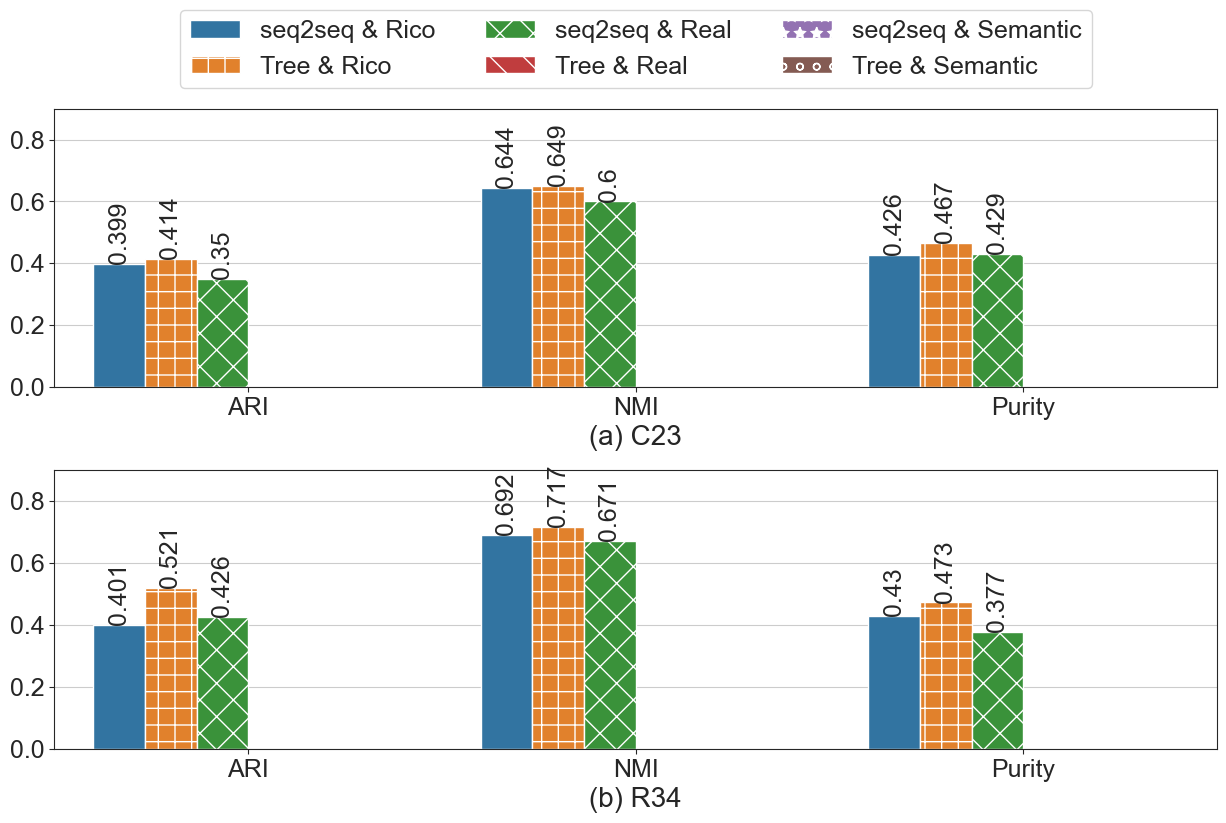

In [92]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23_max, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.9))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34_max, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.9))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 2.7))
plt.savefig('../result/plot_multi_tree.png', format='png', bbox_inches='tight', transparent=True)
plt.savefig('../result/plot_multi_tree.eps', format='eps', bbox_inches='tight')

In [93]:
max_name = ['seq2seq & Rico', 'Tree & Rico', 'seq2seq & Real', 'Tree & Real']
df_ari_23_max_1 = pd.DataFrame([df_ari_23_a[32:41].max().max(), df_ari_23_a[41:50].max().max(), df_ari_23_a[50:59].max().max(), df_ari_23_a[68:77].max().max()])
df_nmi_23_max_1 = pd.DataFrame([df_nmi_23_a[32:41].max().max(), df_nmi_23_a[41:50].max().max(), df_nmi_23_a[50:59].max().max(), df_nmi_23_a[68:77].max().max()])
df_purity_23_max_1 = pd.DataFrame([df_purity_23_a[32:41].max().max(), df_purity_23_a[41:50].max().max(), df_purity_23_a[50:59].max().max(), df_purity_23_a[68:77].max().max()])
df_23_max_1 = pd.concat([df_ari_23_max_1, df_nmi_23_max_1],axis=1)
df_23_max_1 = pd.concat([df_23_max_1, df_purity_23_max_1],axis=1)
df_23_max_1.columns = ['ARI', 'NMI', 'Purity']
df_23_max_1['type'] = max_name
df_23_max_1 = pd.melt(df_23_max_1, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_max_1 = pd.DataFrame([df_ari_34_a[32:41].max().max(), df_ari_34_a[41:50].max().max(), df_ari_34_a[50:59].max().max(), df_ari_34_a[68:77].max().max()])
df_nmi_34_max_1 = pd.DataFrame([df_nmi_34_a[32:41].max().max(), df_nmi_34_a[41:50].max().max(), df_nmi_34_a[50:59].max().max(), df_nmi_34_a[68:77].max().max()])
df_purity_34_max_1 = pd.DataFrame([df_purity_34_a[32:41].max().max(), df_purity_34_a[41:50].max().max(), df_purity_34_a[50:59].max().max(), df_purity_34_a[68:77].max().max()])
df_34_max_1 = pd.concat([df_ari_34_max_1, df_nmi_34_max_1],axis=1)
df_34_max_1 = pd.concat([df_34_max_1, df_purity_34_max_1],axis=1)
df_34_max_1.columns = ['ARI', 'NMI', 'Purity']
df_34_max_1['type'] = max_name
df_34_max_1 = pd.melt(df_34_max_1, id_vars="type", var_name="eval", value_name="eval_values")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


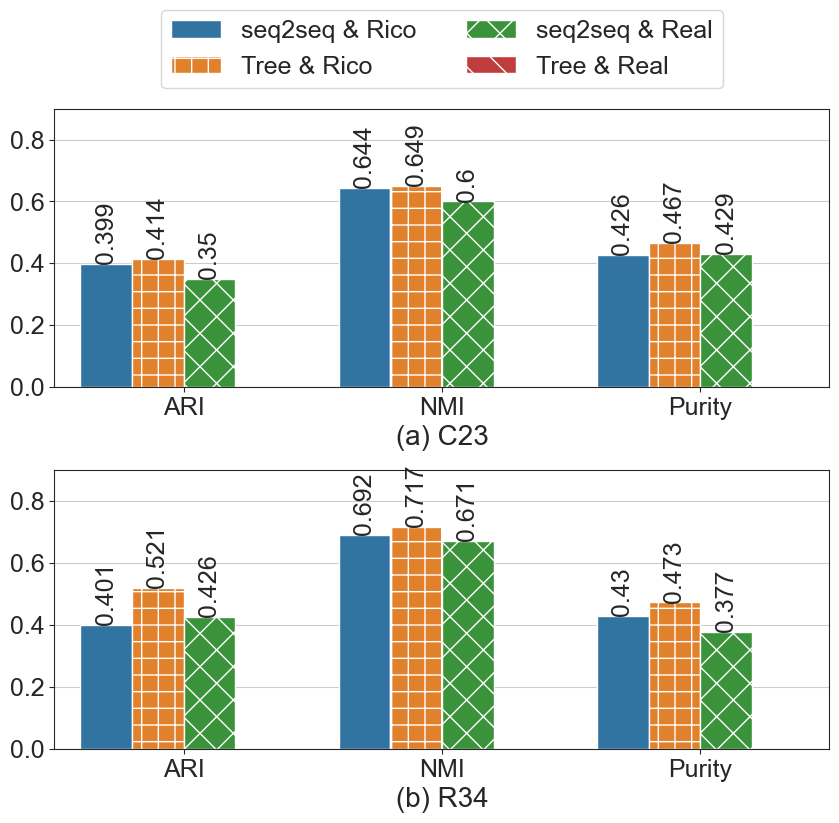

In [94]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23_max_1, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.9))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34_max_1, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.9))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 2.7))
plt.savefig('../result/plot_multi_tree_1.png', format='png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../result/plot_multi_tree_1.eps', format='eps', bbox_inches='tight')

In [95]:

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[5:14].mean(), df_nmi_23_a[14:23].mean(),  df_nmi_23_a[23:32].mean(), df_nmi_23_a[32:41].mean(), df_nmi_23_a[41:50].mean(), df_nmi_23_a[50:59].mean(), df_nmi_23_a[59:68].mean(), df_nmi_23_a[68:77].mean(), df_nmi_23_a[77:86].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[5:14].mean(), df_purity_23_a[14:23].mean(),  df_purity_23_a[23:32].mean(), df_purity_23_a[32:41].mean(), df_purity_23_a[41:50].mean(), df_purity_23_a[50:59].mean(), df_purity_23_a[59:68].mean(), df_purity_23_a[68:77].mean(), df_purity_23_a[77:86].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[5:14].mean(), df_ari_34_a[14:23].mean(),  df_ari_34_a[23:32].mean(), df_ari_34_a[32:41].mean(), df_ari_34_a[41:50].mean(), df_ari_34_a[50:59].mean(), df_ari_34_a[59:68].mean(), df_ari_34_a[68:77].mean(), df_ari_34_a[77:86].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[5:14].mean(), df_nmi_34_a[14:23].mean(),  df_nmi_34_a[23:32].mean(), df_nmi_34_a[32:41].mean(), df_nmi_34_a[41:50].mean(), df_nmi_34_a[50:59].mean(), df_nmi_34_a[59:68].mean(), df_nmi_34_a[68:77].mean(), df_nmi_34_a[77:86].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[5:14].mean(), df_purity_34_a[14:23].mean(),  df_purity_34_a[23:32].mean(), df_purity_34_a[32:41].mean(), df_purity_34_a[41:50].mean(), df_purity_34_a[50:59].mean(), df_purity_34_a[59:68].mean(), df_purity_34_a[68:77].mean(), df_purity_34_a[77:86].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


NameError: name 'mean_name' is not defined

In [ ]:
mean_name = ['Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'Rico & Tree', 'seq2seq & Real', 'seq2seq & Semantic', 'Tree & Real', 'Tree & Semantic']
type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_mean = pd.DataFrame([df_ari_23_a[5:14].mean(), df_ari_23_a[14:23].mean(),  df_ari_23_a[23:32].mean(), df_ari_23_a[32:41].mean(), df_ari_23_a[41:50].mean(), df_ari_23_a[50:59].mean(), df_ari_23_a[59:68].mean(), df_ari_23_a[68:77].mean(), df_ari_23_a[77:86].mean()])
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[5:14].mean(), df_nmi_23_a[14:23].mean(),  df_nmi_23_a[23:32].mean(), df_nmi_23_a[32:41].mean(), df_nmi_23_a[41:50].mean(), df_nmi_23_a[50:59].mean(), df_nmi_23_a[59:68].mean(), df_nmi_23_a[68:77].mean(), df_nmi_23_a[77:86].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[5:14].mean(), df_purity_23_a[14:23].mean(),  df_purity_23_a[23:32].mean(), df_purity_23_a[32:41].mean(), df_purity_23_a[41:50].mean(), df_purity_23_a[50:59].mean(), df_purity_23_a[59:68].mean(), df_purity_23_a[68:77].mean(), df_purity_23_a[77:86].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[5:14].mean(), df_ari_34_a[14:23].mean(),  df_ari_34_a[23:32].mean(), df_ari_34_a[32:41].mean(), df_ari_34_a[41:50].mean(), df_ari_34_a[50:59].mean(), df_ari_34_a[59:68].mean(), df_ari_34_a[68:77].mean(), df_ari_34_a[77:86].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[5:14].mean(), df_nmi_34_a[14:23].mean(),  df_nmi_34_a[23:32].mean(), df_nmi_34_a[32:41].mean(), df_nmi_34_a[41:50].mean(), df_nmi_34_a[50:59].mean(), df_nmi_34_a[59:68].mean(), df_nmi_34_a[68:77].mean(), df_nmi_34_a[77:86].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[5:14].mean(), df_purity_34_a[14:23].mean(),  df_purity_34_a[23:32].mean(), df_purity_34_a[32:41].mean(), df_purity_34_a[41:50].mean(), df_purity_34_a[50:59].mean(), df_purity_34_a[59:68].mean(), df_purity_34_a[68:77].mean(), df_purity_34_a[77:86].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


/tmp/ipykernel_3348/2727007904.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
/tmp/ipykernel_3348/2727007904.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
/tmp/ipykernel_3348/2727007904.py:23: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify 

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

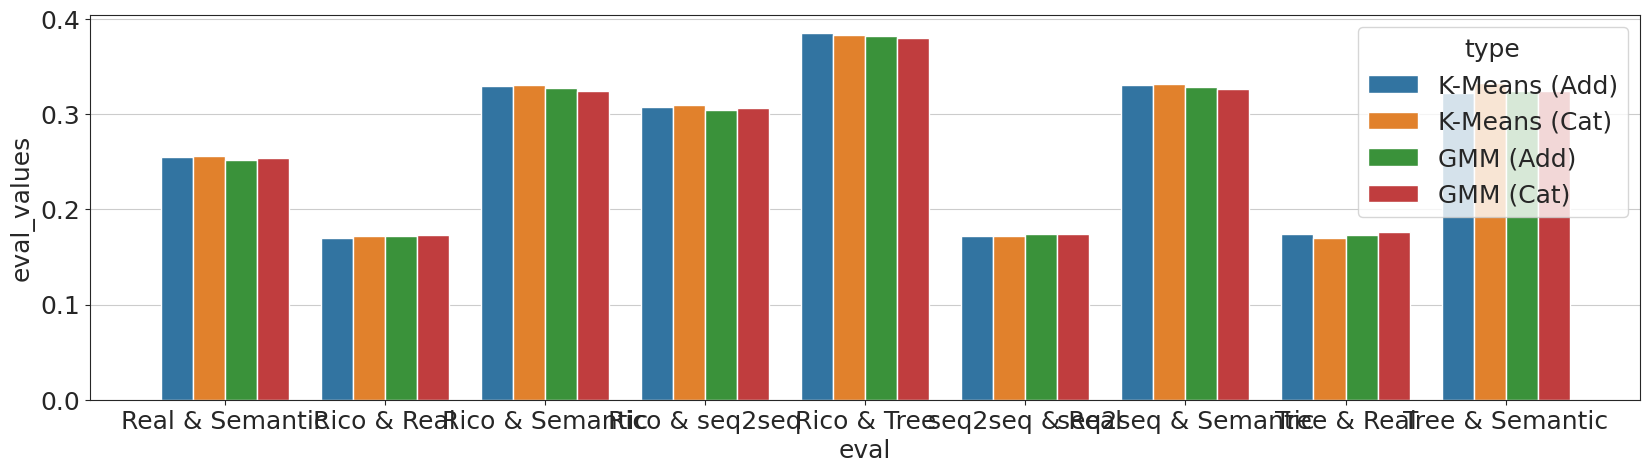

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_23_mean, hue='type')
sns.lineplot(data=df_ari_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper center", bbox_to_anchor=(.5, 1), ncol=4)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_23_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_23_mean, hue='type')
sns.lineplot(data=df_nmi_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.88))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_23_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_23_mean, hue='type')
sns.lineplot(data=df_purity_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.6))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_23_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_34_mean, hue='type')
sns.lineplot(data=df_ari_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_34_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_34_mean, hue='type')
sns.lineplot(data=df_nmi_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.9))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_34_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_34_mean, hue='type')
sns.lineplot(data=df_purity_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.68))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_34_mean.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
max_name = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Tree', 'Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'Rico & Tree', 'seq2seq & Real', 'seq2seq & Semantic', 'Tree & Real', 'Tree & Semantic']
#type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_max = pd.DataFrame([df_ari_23_a[0:1].max().max(), df_ari_23_a[1:2].max().max(), df_ari_23_a[2:3].max().max(), df_ari_23_a[3:4].max().max(), df_ari_23_a[4:5].max().max(), df_ari_23_a[5:14].max().max(), df_ari_23_a[14:23].max().max(),  df_ari_23_a[23:32].max().max(), df_ari_23_a[32:41].max().max(), df_ari_23_a[41:50].max().max(), df_ari_23_a[50:59].max().max(), df_ari_23_a[59:68].max().max(), df_ari_23_a[68:77].max().max(), df_ari_23_a[77:86].max().max()])

df_nmi_23_max = pd.DataFrame([df_nmi_23_a[0:1].max().max(), df_nmi_23_a[1:2].max().max(), df_nmi_23_a[2:3].max().max(), df_nmi_23_a[3:4].max().max(), df_nmi_23_a[4:5].max().max(), df_nmi_23_a[5:14].max().max(), df_nmi_23_a[14:23].max().max(),  df_nmi_23_a[23:32].max().max(), df_nmi_23_a[32:41].max().max(), df_nmi_23_a[41:50].max().max(), df_nmi_23_a[50:59].max().max(), df_nmi_23_a[59:68].max().max(), df_nmi_23_a[68:77].max().max(), df_nmi_23_a[77:86].max().max()])

df_purity_23_max = pd.DataFrame([df_purity_23_a[0:1].max().max(), df_purity_23_a[1:2].max().max(), df_purity_23_a[2:3].max().max(), df_purity_23_a[3:4].max().max(), df_purity_23_a[4:5].max().max(), df_purity_23_a[5:14].max().max(), df_purity_23_a[14:23].max().max(),  df_purity_23_a[23:32].max().max(), df_purity_23_a[32:41].max().max(), df_purity_23_a[41:50].max().max(), df_purity_23_a[50:59].max().max(), df_purity_23_a[59:68].max().max(), df_purity_23_a[68:77].max().max(), df_purity_23_a[77:86].max().max()])

df_ari_34_max = pd.DataFrame([df_ari_34_a[0:1].max().max(), df_ari_34_a[1:2].max().max(), df_ari_34_a[2:3].max().max(), df_ari_34_a[3:4].max().max(), df_ari_34_a[4:5].max().max(), df_ari_34_a[5:14].max().max(), df_ari_34_a[14:23].max().max(),  df_ari_34_a[23:32].max().max(), df_ari_34_a[32:41].max().max(), df_ari_34_a[41:50].max().max(), df_ari_34_a[50:59].max().max(), df_ari_34_a[59:68].max().max(), df_ari_34_a[68:77].max().max(), df_ari_34_a[77:86].max().max()])

df_nmi_34_max = pd.DataFrame([df_nmi_34_a[0:1].max().max(), df_nmi_34_a[1:2].max().max(), df_nmi_34_a[2:3].max().max(), df_nmi_34_a[3:4].max().max(), df_nmi_34_a[4:5].max().max(), df_nmi_34_a[5:14].max().max(), df_nmi_34_a[14:23].max().max(),  df_nmi_34_a[23:32].max().max(), df_nmi_34_a[32:41].max().max(), df_nmi_34_a[41:50].max().max(), df_nmi_34_a[50:59].max().max(), df_nmi_34_a[59:68].max().max(), df_nmi_34_a[68:77].max().max(), df_nmi_34_a[77:86].max().max()])

df_purity_34_max = pd.DataFrame([df_purity_34_a[0:1].max().max(), df_purity_34_a[1:2].max().max(), df_purity_34_a[2:3].max().max(), df_purity_34_a[3:4].max().max(), df_purity_34_a[4:5].max().max(), df_purity_34_a[5:14].max().max(), df_purity_34_a[14:23].max().max(),  df_purity_34_a[23:32].max().max(), df_purity_34_a[32:41].max().max(), df_purity_34_a[41:50].max().max(), df_purity_34_a[50:59].max().max(), df_purity_34_a[59:68].max().max(), df_purity_34_a[68:77].max().max(), df_purity_34_a[77:86].max().max()])



In [ ]:
#df_nmi_34_max.set_index(keys=max_name, inplace=True)
print(df_nmi_23_max)
#print(df_purity_34_a[0:5])


        0
0   0.463
1   0.599
2   0.543
3   0.546
4   0.636
5   0.601
6   0.466
7   0.602
8   0.595
9   0.654
10  0.471
11  0.604
12  0.474
13  0.605


In [ ]:
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[5:14].mean(), df_nmi_23_a[14:23].mean(),  df_nmi_23_a[23:32].mean(), df_nmi_23_a[32:41].mean(), df_nmi_23_a[41:50].mean(), df_nmi_23_a[50:59].mean(), df_nmi_23_a[59:68].mean(), df_nmi_23_a[68:77].mean(), df_nmi_23_a[77:86].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[5:14].mean(), df_purity_23_a[14:23].mean(),  df_purity_23_a[23:32].mean(), df_purity_23_a[32:41].mean(), df_purity_23_a[41:50].mean(), df_purity_23_a[50:59].mean(), df_purity_23_a[59:68].mean(), df_purity_23_a[68:77].mean(), df_purity_23_a[77:86].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[5:14].mean(), df_ari_34_a[14:23].mean(),  df_ari_34_a[23:32].mean(), df_ari_34_a[32:41].mean(), df_ari_34_a[41:50].mean(), df_ari_34_a[50:59].mean(), df_ari_34_a[59:68].mean(), df_ari_34_a[68:77].mean(), df_ari_34_a[77:86].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[5:14].mean(), df_nmi_34_a[14:23].mean(),  df_nmi_34_a[23:32].mean(), df_nmi_34_a[32:41].mean(), df_nmi_34_a[41:50].mean(), df_nmi_34_a[50:59].mean(), df_nmi_34_a[59:68].mean(), df_nmi_34_a[68:77].mean(), df_nmi_34_a[77:86].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[5:14].mean(), df_purity_34_a[14:23].mean(),  df_purity_34_a[23:32].mean(), df_purity_34_a[32:41].mean(), df_purity_34_a[41:50].mean(), df_purity_34_a[50:59].mean(), df_purity_34_a[59:68].mean(), df_purity_34_a[68:77].mean(), df_purity_34_a[77:86].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

ValueError: Length mismatch: Expected axis has 36 elements, new values have 9 elements